<a href="https://colab.research.google.com/github/alexf8411/BDCity/blob/main/Regresi%C3%B3n_Log%C3%ADstica_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://lh3.googleusercontent.com/pw/AP1GczNb6-cejramVQ5fd84L6sa8H-12XKFRglzlEn0m7l2RC5HQyqrUTqHGoycf2EWMJcnoAZnASHHJwvLtgXWQeum2j3FocjSRgSgr9rkS0qk8cMflhUOPTanHZ6OthV51TptZAX4-o6Q9ZTjApMdziUH7MQ=w2363-h945-s-no-gm?authuser=0" alt="Analisis de datos estadísticos Hipertensión">

<h1> <font color="#014040"> <B> Fundamentos para IA, semana 8. Regresión logística </font> </h1>
<p><font color="#0367A6"> <p>En este notebook, se utilizará el Dataset Framingham para explorar y analizar datos relacionados con la hipertensión y otros factores de riesgo cardiovascular. Este conjunto de datos es de vital importancia para mí debido a mi condición personal de hipertensión. El estudio de Framingham se orienta al análisis de factores de riesgo cardiovascular y la predicción del riesgo de desarrollar enfermedad cardíaca coronaria (CHD) en un período de diez años.</font></p>

<p><font color="#0367A6"> Características iniciales del Dataset Framingham:

  <ul>
    <li><b>male:</b> Género del individuo (1 = masculino, 0 = femenino).</li>
    <li><b>age:</b> Edad del individuo en años.</li>
    <li><b>education:</b> Nivel de educación del individuo (en escala de 0 a 5).</li>
    <li><b>currentSmoker:</b> Si el individuo es fumador actual (1) o no (0).</li>
    <li><b>cigsPerDay:</b> Promedio de cigarrillos fumados por día por el individuo.</li>
    <li><b>BPMeds:</b> Si el individuo toma medicamentos para la presión arterial (1) o no (0).</li>
    <li><b>prevalentStroke:</b> Si el individuo ha tenido un accidente cerebrovascular previo (1) o no (0).</li>
    <li><b>prevalentHyp:</b> Si el individuo tiene hipertensión prevalente (1) o no (0).</li>
    <li><b>diabetes:</b> Si el individuo tiene diabetes (1) o no (0).</li>
    <li><b>totChol:</b> Nivel total de colesterol en mg/dL.</li>
    <li><b>sysBP:</b> Presión arterial sistólica del individuo en mmHg.</li>
    <li><b>diaBP:</b> Presión arterial diastólica del individuo en mmHg.</li>
    <li><b>BMI:</b> Índice de masa corporal del individuo (kg/m^2).</li>
    <li><b>heartRate:</b> Frecuencia cardíaca del individuo en latidos por minuto.</li>
    <li><b>glucose:</b> Nivel de glucosa en sangre en mg/dL.</li>
    <li><b>TenYearCHD:</b> Riesgo de desarrollar enfermedad cardíaca coronaria en los próximos diez años (1 = riesgo, 0 = no riesgo).</li>
  </ul>
</font>
</p>


# **1) Importación de librerias.**


Las librerías se importan en Python para hacer uso de las funciones y clases que estas contienen. De este modo le agregamos funcionalidades adicionales al notebook. Para este ejercicio se realizó la importación de Pandas, que se utiliza para la manipulación y análisis de datos, mientras que Numpy proporciona herramientas para operaciones matemáticas eficientes en arreglos multidimensionales. Matplotlib y Seaborn se utilizan para la visualización de datos.

In [ ]:
# Se realiza la importación de las librerías.

import pandas as pd #Librería para el análisis y manipulación de datos.
import numpy as np #Librería para realizar operaciones matemáticas avanzadas.
import matplotlib.pyplot as plt #Librería para crear y visualizar datos de manera gráfica en 2D.
import seaborn as sns #Librería para visualizaciones estadísticas, mejora estética y funcionalidad.
import plotly.express as px  # Para gráficos más simples y rápidos.
from mpl_toolkits.mplot3d import Axes3D # Herramienta para crear gráficos en 3D.
from plotnine import ggplot, aes, geom_boxplot, labs, theme, element_blank
import scipy.stats as sp

from collections import Counter

from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import metrics

from imblearn.under_sampling import NearMiss

import warnings
import random

# Ignorar todos los warnings
warnings.filterwarnings("ignore")

# **2) Carga del conjunto de datos y creación del DataFrame.**
El conjunto de datos de Framingham fue adquirido de la página web www.kaggle.com, este conjunto está compuesto por un total de 4237 registros.
Se procede con la carga del Dataset y creación del DataFrame en un objeto de Pandas con el objetivo de crear un análisis exploratorio preliminar, para ello identificaremos la estructura del DataFrame y visualizaremos los primeros y últimos registros que lo componen.

In [ ]:
# Importa el conjunto de datos con extensión.csv, creando el DataFrame y almacenándolo en el objeto df.
df = pd.read_csv('framingham.csv')

# Indica la cantidad de filas y columnas.
print("El número de filas es:", df.shape[0], "y el número de columnas es:", df.shape[1])

# Muestra las primeras y últimas 4 filas del DataFrame para verificar que se cargó correctamente.
display(pd.concat([df.head(4), df.tail(4)]))

El número de filas es: 4238 y el número de columnas es: 16


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


# **3) Exploración de los datos.**

La exploración de datos tiene como objeto comprender a fondo el conjunto de datos; se deben comprender patrones, anomalías y relaciones en pro de mejorar el proceso de modelado y análisis subsiguiente.


*   Para facilitar la comprensión de la información y el trabajo analítico, decidorenombrar las variables, dejando un nombre descriptivo en español correspondiente a cada una de las columnas.

In [ ]:
# Renombramiento de las columnas del DataFrame.
df.columns = ['Gen', 'Edad', 'Edu', 'Fuma', 'Cig', 'Med_PA', 'ACV_pre', 'HTA_pre', 'Diab', \
              'Cole', 'PSS', 'PDS', 'IMC', 'FC', 'Glu', 'riesgoCVD_10años']

*  Se utiliza el método .info() de pandas para obtener un resumen conciso del DataFrame. Este método provee información esencial acerca del DataFrame.

In [ ]:
# Se visualiza información general sobre el DataFrame: el número de filas, columnas, tipo de datos de cada variable (Columna) y uso de memoria.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gen               4238 non-null   int64  
 1   Edad              4238 non-null   int64  
 2   Edu               4133 non-null   float64
 3   Fuma              4238 non-null   int64  
 4   Cig               4209 non-null   float64
 5   Med_PA            4185 non-null   float64
 6   ACV_pre           4238 non-null   int64  
 7   HTA_pre           4238 non-null   int64  
 8   Diab              4238 non-null   int64  
 9   Cole              4188 non-null   float64
 10  PSS               4238 non-null   float64
 11  PDS               4238 non-null   float64
 12  IMC               4219 non-null   float64
 13  FC                4237 non-null   float64
 14  Glu               3850 non-null   float64
 15  riesgoCVD_10años  4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.

**Observación sobre los datos:**
1. Algunas variables tienen valores faltantes (NaN). Por ejemplo, las columnas "Edu" (nivel educativo), "Cig" (número de cigarrillos), "Med_PA" (medicamentos para la presión arterial), "Cole" (nivel de colesterol), "IMC" (Índice de Masa Corporal), "FC" (Frecuencia Cardíaca), y "Glu" (nivel de glucosa) tienen valores faltantes en diferentes proporciones.
2. La mayoría de las variables son de tipo flotante (float64) o entero (int64), lo cual es apropiado para la mayoría de los análisis. por otro lado, la variable "Edu" está representada como flotante en lugar de entero, esto podría deberse a la presencia de valores faltantes.
3. Las variables categóricas están representadas como enteros (0 o 1), lo que sugiere que son variables binarias (por ejemplo, "Gen", "Fuma", "ACV_pre", "HTA_pre", "Diab" y "riesgoCVD_10años" para el riesgo cardiovascular a 10 años).

In [ ]:
# Calcula el número de registros por categoría en la variable objeto
print(df.groupby('riesgoCVD_10años').size())

riesgoCVD_10años
0    3594
1     644
dtype: int64


**Observación:** El conjunto de datos tiene un desbalance significativo en la variable objetivo "riesgoCVD_10años". Hay muchas más instancias de personas con bajo riesgo (valor 0) que personas con alto riesgo (valor 1). Esto puede ser problemático para modelar el algoritmo de regresión logística, ya que puede tener dificultades para aprender patrones en la clase minoritaria debido a la falta de registros.

# **4) Medidas de tendencia central.**


Las medidas de tendencia central, como la media, mediana y moda, son estadísticas descriptivas que permiten sintetizar la distribución de un conjunto de datos mediante un valor representativo. Estas medidas pueden calcularse en Python a través de la librería NumPy.

In [ ]:
# Estadísticas descriptivas
print(df.describe())

               Gen         Edad          Edu         Fuma          Cig  \
count  4238.000000  4238.000000  4133.000000  4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950     0.494101     9.003089   
std       0.495022     8.572160     1.019791     0.500024    11.920094   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%       0.000000    42.000000     1.000000     0.000000     0.000000   
50%       0.000000    49.000000     2.000000     0.000000     0.000000   
75%       1.000000    56.000000     3.000000     1.000000    20.000000   
max       1.000000    70.000000     4.000000     1.000000    70.000000   

            Med_PA      ACV_pre      HTA_pre         Diab         Cole  \
count  4185.000000  4238.000000  4238.000000  4238.000000  4188.000000   
mean      0.029630     0.005899     0.310524     0.025720   236.721585   
std       0.169584     0.076587     0.462763     0.158316    44.590334   
min       0.000000     0.000000     0

**Observación de las variables estadísticas descriptivas:**

1. La edad promedio del conjunto de datos es de 49.58 años, con una desviación estándar de 8.57 años, lo cual abarca un rango de edades que va desde los 32 hasta los 70 años, es un rango alto, pero solo tiene en cuenta personas adultas.
2. Cerca del 49.41% de la población presente en este estudio son fumadores.
3. La media de la presión arterial (Med_PA) es 0.0296, esto indica que la mayoría de la muestra tiene una presión arterial baja. Sin embargo, la desviación estándar es considerable (0.1696), lo que sugiere una variabilidad de los datos significativa en esta variable.
4. Se observa una baja presencia de enfermedades crónicas, la prevalencia de ACV (0.58%), HTA (31.05%), Diabetes (2.57%), y riesgo cardiovascular a 10 años (15.20%).
5. El índice de masa corporal medio es de 25.80, por lo cual podríamos establecer que en promedio la población de la investigación sufre de sobrepeso.





In [ ]:
# Calcular la moda de la variable 'Cig' (Promedio de cigarrillos fumados por día por el individuo.)
moda_Cig = df['Cig'].mode()
print("La moda de cigarrillos fumados por día es:", moda_Cig[0])


La moda de cigarrillos fumados por día es: 0.0


**Observación:** La moda es el valor que aparece con mayor frecuencia en un DataFrame para una variable en específico, en este caso, la moda de "Cig" es 0, lo que indica que la mayoría de las personas en el conjunto de datos no fuman cigarrillos, sin embargo, hay una alta variabilidad en la cantidad de cigarrillos que fuman las personas que lo hacen, con algunos fumadores consumiendo cantidades significativas de hasta 70 cigarrillos por día.

In [ ]:
# Calcula la desviación estándar para colesterol.
desviacion_col = df['Cole'].std()
media_col = df['Cole'].mean()
mediana_col = df['Cole'].median()
moda_col = df['Cole'].mode()

print("Desviación estándar de colesterol:", desviacion_col)
print("Media de colesterol:", media_col)
print("Mediana de colesterol:", mediana_col)
print("Moda de colesterol:", moda_col[0])

Desviación estándar de colesterol: 44.590334318749456
Media de colesterol: 236.72158548233045
Mediana de colesterol: 234.0
Moda de colesterol: 240.0


**Observación:** La desviación estándar de 44.59 indica que hay una gran dispersión en los valores de colesterol alrededor de la media, la mediana de colesterol es de 234.0, por lo cual es ligeramente menor que la media, esto indica que la distribución de los valores de colesterol podría estar sesgada hacia la izquierda.

# **5) Limpieza de datos**
En esta parte del ejercicio realizaremos la imputación de datos. En un estudio sobre la imputación de datos, Mario Ávila (2022) indica que "La imputación de datos es el proceso de estimar valores faltantes en un conjunto de datos"(p. 11), esto con el fin de mantener la integridad y utilidad de los datos. En Python, realizaremos la imputación de datos con la librería pandas, que ofrece diversas herramientas para realizar esta tarea de manera efectiva.

In [ ]:
#SAber cuantos datos faltantes en cada columna del DataFrame df
df.isnull().sum()

Gen                   0
Edad                  0
Edu                 105
Fuma                  0
Cig                  29
Med_PA               53
ACV_pre               0
HTA_pre               0
Diab                  0
Cole                 50
PSS                   0
PDS                   0
IMC                  19
FC                    1
Glu                 388
riesgoCVD_10años      0
dtype: int64

In [ ]:
# Copia del DataFrame original para mantenerlo intacto y realizar la imputación sobre la copia
df_limpio = df.copy()

In [ ]:
df_limpio["Edu"].unique()

array([ 4.,  2.,  1.,  3., nan])

In [ ]:
# Reemplazar los valores nulos en la columna "Edu" con la moda
moda_edu = df_limpio['Edu'].mode()[0]  # Calcula la moda de la columna "Edu"
df_limpio['Edu'].fillna(moda_edu, inplace=True)  # Reemplaza los valores nulos con la moda

# Verificar que ya no hay valores nulos en la columna "Edu"
print("Número de valores nulos en la columna 'Edu' después del reemplazo:", df_limpio['Edu'].isnull().sum())

Número de valores nulos en la columna 'Edu' después del reemplazo: 0


In [ ]:
# Reemplazar los valores nulos en la columna "Cig" con la media
mean_cig = df_limpio['Cig'].mean()  # Calcula la media de la columna "Cig"
df_limpio['Cig'].fillna(mean_cig, inplace=True)  # Reemplaza los valores nulos con la media

# Verificar que ya no hay valores nulos en la columna "Cig"
print("Número de valores nulos en la columna 'Cig' después del reemplazo:", df_limpio['Cig'].isnull().sum())

Número de valores nulos en la columna 'Cig' después del reemplazo: 0


In [ ]:
# Reemplazar los valores nulos en la columna "Med_PA" con la moda
moda_med_pa = df_limpio['Med_PA'].mode()[0]  # Calcula la moda de la columna "Med_PA"
df_limpio['Med_PA'].fillna(moda_med_pa, inplace=True)  # Reemplaza los valores nulos con la moda

# Verificar que ya no hay valores nulos en la columna "Med_PA"
print("Número de valores nulos en la columna 'Med_PA' después del reemplazo:", df_limpio['Med_PA'].isnull().sum())

Número de valores nulos en la columna 'Med_PA' después del reemplazo: 0


In [ ]:
# Reemplazar los valores nulos en la columna "Cole" con la media
mean_cole = df_limpio['Cole'].mean()  # Calcula la media de la columna "Cole"
df_limpio['Cole'].fillna(mean_cole, inplace=True)  # Reemplaza los valores nulos con la media

# Verificar que ya no hay valores nulos en la columna "Cole"
print("Número de valores nulos en la columna 'Cole' después del reemplazo:", df_limpio['Cole'].isnull().sum())

Número de valores nulos en la columna 'Cole' después del reemplazo: 0


In [ ]:
# Reemplazar los valores nulos en la columna "Glu" con la media
mean_glu = df_limpio['Glu'].mean()  # Calcula la media de la columna "Glu"
df_limpio['Glu'].fillna(mean_glu, inplace=True)  # Reemplaza los valores nulos con la media

# Verificar que ya no hay valores nulos en la columna "Glu"
print("Número de valores nulos en la columna 'Glu' después del reemplazo:", df_limpio['Glu'].isnull().sum())

Número de valores nulos en la columna 'Glu' después del reemplazo: 0


In [ ]:
# Crear un objeto SelectKBest para seleccionar las mejores características
bf = SelectKBest(score_func=chi2, k=10)

# Ajustar el objeto SelectKBest a tus datos
fit = bf.fit(X_r, y_r)

# Imprimir las características seleccionadas
selected_features = X_r.columns[fit.get_support()]
print("Características seleccionadas:")
print(selected_features)

Características seleccionadas:
Index(['Gen', 'Edad', 'Cig', 'Med_PA', 'HTA_pre', 'Diab', 'Cole', 'PSS', 'PDS',
       'Glu'],
      dtype='object')


In [ ]:
# Eliminar filas con valores nulos
df_limpio = df_limpio.dropna()

# Confirmar nuevamente el porcentaje de datos faltantes por columna
porcentaje_faltantes = df_limpio.isnull().mean() * 100
print(porcentaje_faltantes)

Gen                 0.0
Edad                0.0
Edu                 0.0
Fuma                0.0
Cig                 0.0
Med_PA              0.0
ACV_pre             0.0
HTA_pre             0.0
Diab                0.0
Cole                0.0
PSS                 0.0
PDS                 0.0
IMC                 0.0
FC                  0.0
Glu                 0.0
riesgoCVD_10años    0.0
dtype: float64


 **Observación:**  Se confirma que la imputación de datos fue exitosa y no se presentan datos nulos.

In [ ]:
df_limpio.describe(include="all")

,Gen,Edad,Edu,Fuma,Cig,Med_PA,ACV_pre,HTA_pre,Diab,Cole,PSS,PDS,IMC,FC,Glu,riesgoCVD_10años
count,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000,4218.000000
mean,0.429825,49.572309,1.955192,0.494547,9.015668,0.029161,0.005453,0.310100,0.025367,236.779127,132.325154,82.905880,25.801181,75.877904,81.936052,0.150071
std,0.495110,8.556892,1.018740,0.500030,11.888492,0.168277,0.073650,0.462589,0.157257,44.339952,21.964470,11.905447,4.080241,12.030829,22.640598,0.357183
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.395000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.750000,143.875000,89.500000,28.040000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# Crear un DataFrame X_r que contenga todas las características independientes
X_r = df_limpio.drop(["riesgoCVD_10años"], axis=1)

# Crear una Serie y_r que contenga la variable dependiente (target)
y_r = df_limpio["riesgoCVD_10años"]

In [ ]:
# Crear un objeto SelectKBest para seleccionar las mejores características
bf = SelectKBest(score_func=chi2, k=10)

# Ajustar el objeto SelectKBest a tus datos
fit = bf.fit(X_r, y_r)

# Crear un DataFrame con los puntajes de la prueba chi-cuadrado
dfscores = pd.DataFrame(fit.scores_)

# Crear un DataFrame con los nombres de las características originales
dfcolumns = pd.DataFrame(X_r.columns)

# Imprimir los DataFrames
print("Puntajes de la prueba chi-cuadrado para cada característica:")
print(dfscores)

print("\nNombres de las características originales:")
print(dfcolumns)

Puntajes de la prueba chi-cuadrado para cada característica:
             0
0    19.949467
1   305.779474
2     5.730029
3     0.956349
4   235.636583
5    29.577199
6    10.493548
7    88.785785
8    35.278032
9   251.862691
10  698.879803
11  151.974121
12   15.210734
13    4.535384
14  369.324229

Nombres de las características originales:
          0
0       Gen
1      Edad
2       Edu
3      Fuma
4       Cig
5    Med_PA
6   ACV_pre
7   HTA_pre
8      Diab
9      Cole
10      PSS
11      PDS
12      IMC
13       FC
14      Glu


In [ ]:
# Concatenar los DataFrames dfcolumns y dfscores a lo largo de las columnas
featurescores = pd.concat([dfcolumns, dfscores], axis=1)

# Renombrar las columnas del DataFrame resultante
featurescores.columns = ["spec", "score"]
featurescores


,spec,score
0,Gen,19.949467
1,Edad,305.779474
2,Edu,5.730029
3,Fuma,0.956349
4,Cig,235.636583
5,Med_PA,29.577199
6,ACV_pre,10.493548
7,HTA_pre,88.785785
8,Diab,35.278032
9,Cole,251.862691


In [ ]:
# Imprimir las 10 características con los puntajes más altos
print(featurescores.nlargest(10, 'score'))

       spec       score
10      PSS  698.879803
14      Glu  369.324229
1      Edad  305.779474
9      Cole  251.862691
4       Cig  235.636583
11      PDS  151.974121
7   HTA_pre   88.785785
8      Diab   35.278032
5    Med_PA   29.577199
0       Gen   19.949467


In [ ]:
# Seleccionar las características de interés
X = df_limpio[["PSS", "Glu", "Edad", "Cole", "Cig", "PDS", "HTA_pre", "Diab", "Med_PA", "Gen"]]
y = df_limpio["riesgoCVD_10años"]

In [ ]:
df_limpio["riesgoCVD_10años"].value_counts()

riesgoCVD_10años
0    3585
1     633
Name: count, dtype: int64

# **Submuestreo**

In [ ]:
# Crear un objeto NearMiss
nm = NearMiss()

# Aplicar el submuestreo y obtener los datos de características y la variable dependiente balanceados
X_res, y_res = nm.fit_resample(X, y)

In [ ]:
X_res.shape,y_res.shape

((1266, 10), (1266,))

In [ ]:
df_limpio.dtypes

Gen                   int64
Edad                  int64
Edu                 float64
Fuma                  int64
Cig                 float64
Med_PA              float64
ACV_pre               int64
HTA_pre               int64
Diab                  int64
Cole                float64
PSS                 float64
PDS                 float64
IMC                 float64
FC                  float64
Glu                 float64
riesgoCVD_10años      int64
dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
logisticRegr = LogisticRegression()

In [ ]:
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions = logisticRegr.predict(X_test)

In [ ]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.7272727272727273


In [ ]:
# Calcula la matriz de confusión
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

# Imprime la matriz de confusión
print(confusion_matrix)

[[169  50]
 [ 64 135]]


# **6) Balanceo de datos**
Es un proceso utilizado para igualar la proporción de clases en un conjunto de datos desbalanceado, lo que ayuda a mejorar el rendimiento de los modelos de Machine Learning al garantizar que todas las clases estén representadas de manera equitativa durante el entrenamiento. En este Dataframe, como ya pudimos observar, tan solo el 15.23% de los registros corresponden a la clase 1 de la variable objeto: "riesgoCVD_10años". Por lo tanto, es importante balancear los datos, en vista de que tenemos una considerable cantidad de datos y que se trata de información sensible de tipo numerica, considero que lo más adecuado es usar la técnica de submuestreo.

In [ ]:
# Verificar el balance de clases
print("Balance de clases antes del submuestreo:")
print(df_limpio['riesgoCVD_10años'].value_counts())

# Separa las clases mayoritaria y minoritaria
df_majority = df_limpio[df_limpio['riesgoCVD_10años'] == 0]
df_minority = df_limpio[df_limpio['riesgoCVD_10años'] == 1]

# Submuestreo de la clase mayoritaria al azar
df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)

# Combina las muestras submuestreadas con la clase minoritaria
df_limpio = pd.concat([df_majority_downsampled, df_minority])

# Verifica el balance de clases después del submuestreo
print("Balance de clases después del submuestreo:")
print(df_limpio['riesgoCVD_10años'].value_counts())

Balance de clases antes del submuestreo:
riesgoCVD_10años
0    3558
1     631
Name: count, dtype: int64
Balance de clases después del submuestreo:
riesgoCVD_10años
0    631
1    631
Name: count, dtype: int64


**Observaciones del balanceo:**
1. Había 3558 registros de la clase 0 y 631 de la clase 1. Después del submuestreo, ambas clases tienen el mismo número de instancias, con 631 instancias cada una.
2. El submuestreo ha logrado igualar el número de instancias en ambas clases, lo que puede mejorar el rendimiento del algoritmo de Machine Learning.
3. El reducir el número de registros en la clase mayoritaria, se puede reducir el tiempo de entrenamiento del modelo.
4. El submuestreo consiste en eliminar registros de la clase mayoritaria para lograr el balanceo. Esto lleva a una inevitable pérdida de información, considerable en caso de que los registros eliminados contengan casos relevantes para el estudio.

# **6) Visualización avanzada de los datos**
Se procede a representar la información del DataFrame de manera efectiva y comprensible, lo cual nos ayudará a comprender la relación entre las variables predictoras y la variable objetivo, identificar patrones y detectar valores atípicos dentro del modelo.

**Graficación de variables categóricas.**

Estas proporcionan una representación visual de la distribución y relaciones entre las diferentes categorías en un conjunto de datos. Para este caso, quiero analizar la relación entre las diferentes variables categorícas con la variable objeto.

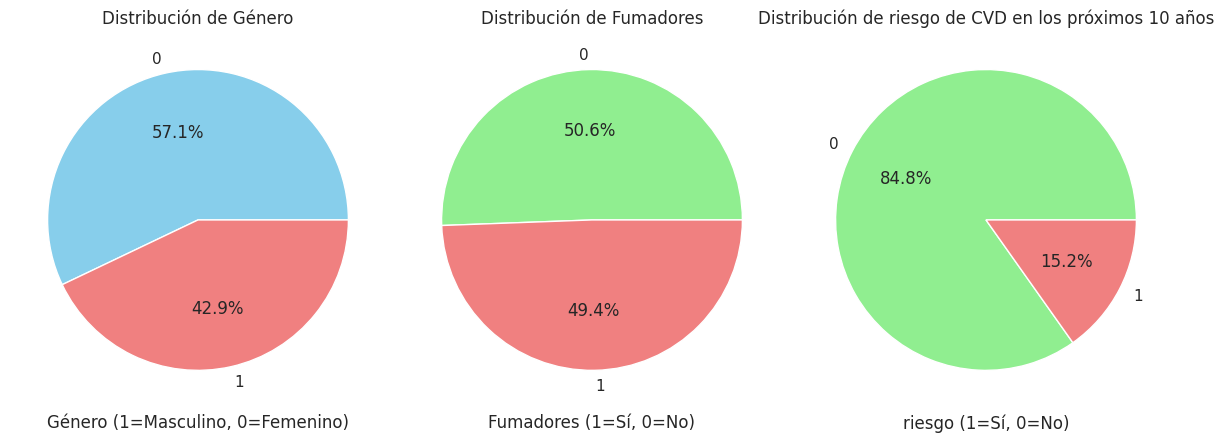

In [ ]:
# Configuración de los subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Gráfico de torta para la variable Género
df_limpio['Gen'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], ax=axs[0])
axs[0].set_title('Distribución de Género')
axs[0].set_xlabel('Género (1=Masculino, 0=Femenino)')
axs[0].set_ylabel('')

# Gráfico de torta para la variable Fumadores
df_limpio['Fuma'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], ax=axs[1])
axs[1].set_title('Distribución de Fumadores')
axs[1].set_xlabel('Fumadores (1=Sí, 0=No)')
axs[1].set_ylabel('')

# Gráfico de torta para la variable riesgoCVD_10años
df_limpio['riesgoCVD_10años'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], ax=axs[2])
axs[2].set_title('Distribución de riesgo de CVD en los próximos 10 años')
axs[2].set_xlabel('riesgo (1=Sí, 0=No)')
axs[2].set_ylabel('')

# Ajustar espaciado
plt.tight_layout()

# Mostrar los gráficos
plt.show()


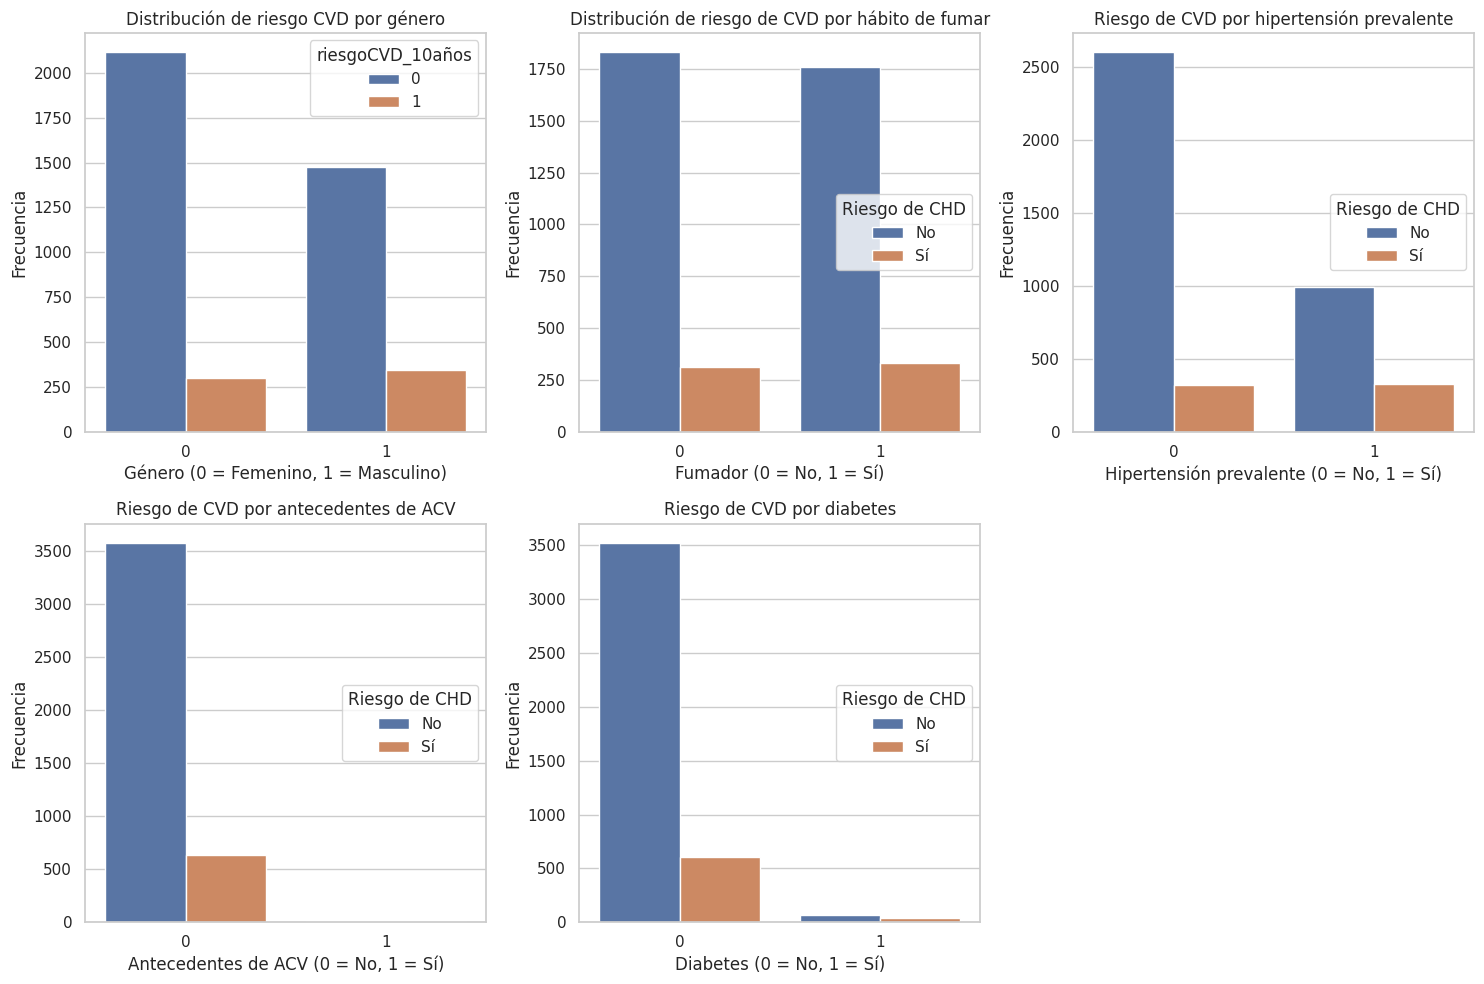

In [ ]:
# Configuración de estilo para seaborn
sns.set(style="whitegrid")

# Configuración de estilo para seaborn
sns.set(style="whitegrid")

# Creación de una figura con 6 subplots
plt.figure(figsize=(15, 10))

# Gráfico de barras para la variable "Género" en relación con la variable objetivo
plt.subplot(2, 3, 1)
sns.countplot(x='Gen', hue='riesgoCVD_10años', data=df_limpio)
plt.title('Distribución de riesgo CVD por género')
plt.xlabel('Género (0 = Femenino, 1 = Masculino)')
plt.ylabel('Frecuencia')

# Gráfico de barras para la distribución de fumadores en relación con el riesgo de CVD
plt.subplot(2, 3, 2)
sns.countplot(x='Fuma', hue='riesgoCVD_10años', data=df_limpio)
plt.title('Distribución de riesgo de CVD por hábito de fumar')
plt.xlabel('Fumador (0 = No, 1 = Sí)')
plt.ylabel('Frecuencia')
plt.legend(title='Riesgo de CHD', labels=['No', 'Sí'], loc='center right')

# Gráfico de barras para la distribución de hipertensión en relación con el riesgo de CVD
plt.subplot(2, 3, 3)
sns.countplot(x='HTA_pre', hue='riesgoCVD_10años', data=df_limpio)
plt.title('Riesgo de CVD por hipertensión prevalente')
plt.xlabel('Hipertensión prevalente (0 = No, 1 = Sí)')
plt.ylabel('Frecuencia')
plt.legend(title='Riesgo de CHD', labels=['No', 'Sí'], loc='center right')

# Gráfico de barras para la distribución de ACV_pre en relación con el riesgo de CVD
plt.subplot(2, 3, 4)
sns.countplot(x='ACV_pre', hue='riesgoCVD_10años', data=df_limpio)
plt.title('Riesgo de CVD por antecedentes de ACV')
plt.xlabel('Antecedentes de ACV (0 = No, 1 = Sí)')
plt.ylabel('Frecuencia')
plt.legend(title='Riesgo de CHD', labels=['No', 'Sí'], loc='center right')

# Gráfico de barras para la distribución de Diab en relación con el riesgo de CVD
plt.subplot(2, 3, 5)
sns.countplot(x='Diab', hue='riesgoCVD_10años', data=df_limpio)
plt.title('Riesgo de CVD por diabetes')
plt.xlabel('Diabetes (0 = No, 1 = Sí)')
plt.ylabel('Frecuencia')
plt.legend(title='Riesgo de CHD', labels=['No', 'Sí'], loc='center right')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar la figura completa
plt.show()

**Observaciones gráficas de variables categorícas:**
* En primer lugar, vemos que el balanceo de datos funcionó muy bien, ya que la distribución de la variable: 'riesgoCVD_10años', es perfecta. Las distribuciones de género y fumadores también son bastantes cercanas al 50%.
* En cuanto a la distribución de cada una de las variables categorícas con respecto a la variable objeto. De acuerdo con la muestra, el género femenino tiende a tener mayor riesgo de enfermedad cardiaca coronaria en los próximos 10 años en comparación con los hombres. El hábito de fumar sí es un variable asociado al riesgo CVD. Si bien la mayoría de la muestra no presenta hipertensión prevalente, para las personas que sí lo presentan existe una correlación marcada con el riesgo de CVD.
* Finalmente observamos que son muy pequeñas las muestras de población con antecedentes ACV y diabetes, sin embargo, sí se muestra una correlación marcada entre los casos y el riesgo.


**Graficación de variables numéricas.**

La visualización de variables numéricas no categóricas explora la distribución de datos, detecta valores atípicos y analiza relaciones entre variables cuantitativas.

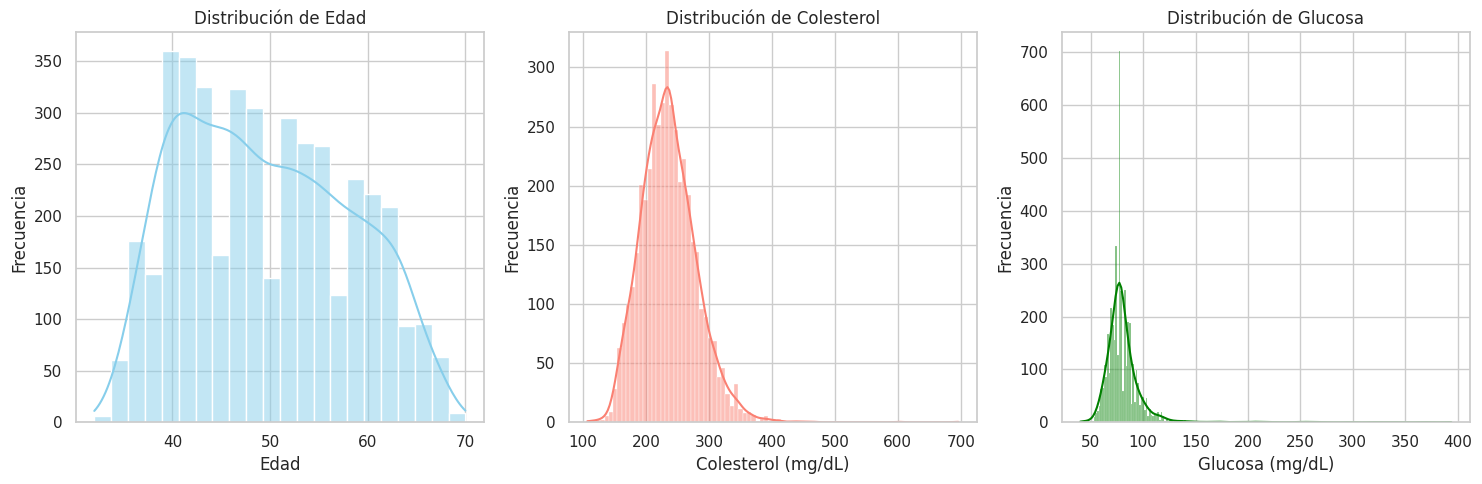

In [ ]:
# Configuración de estilo para seaborn
sns.set(style="whitegrid")

# Creación de una figura con 3 subplots
plt.figure(figsize=(15, 5))

# Histograma para la variable de edad
plt.subplot(1, 3, 1)
sns.histplot(df_limpio['Edad'], kde=True, color='skyblue')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Histograma para la variable de colesterol
plt.subplot(1, 3, 2)
sns.histplot(df_limpio['Cole'], kde=True, color='salmon')
plt.title('Distribución de Colesterol')
plt.xlabel('Colesterol (mg/dL)')
plt.ylabel('Frecuencia')

# Histograma para la variable de glucosa
plt.subplot(1, 3, 3)
sns.histplot(df_limpio['Glu'], kde=True, color='green')
plt.title('Distribución de Glucosa')
plt.xlabel('Glucosa (mg/dL)')
plt.ylabel('Frecuencia')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los histogramas
plt.show()

**Observación**: Estas gráficas son interesantes y nos confirman algunos datos preliminares:
La mayoría de las personas se encuentran en el rango de edad entre 40 y 60 años, con una distribución aproximadamente simétrica, con una ligera tendencia hacia la edad de 50 años.
La mayoría de las personas tienen niveles de colesterol dentro del rango normal (menos de 200 mg/dL).
Hay una cantidad considerable de personas con niveles de glucosa en sangre elevados (por encima de 126 mg/dL).

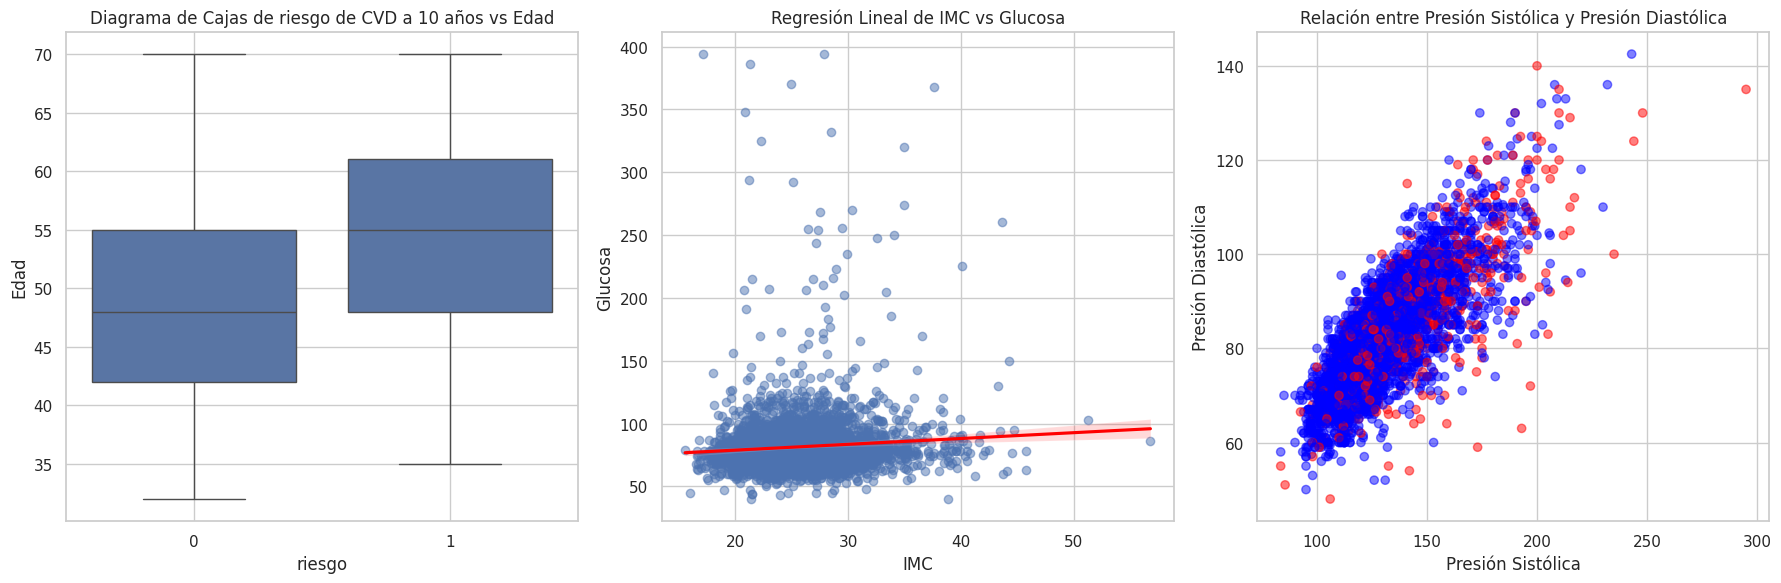

In [ ]:
# Configurar subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de caja (Boxplot) de riesgoCVD_10años vs Edad
sns.boxplot(x='riesgoCVD_10años', y='Edad', data=df_limpio, ax=axs[0])
axs[0].set_title('Diagrama de Cajas de riesgo de CVD a 10 años vs Edad')
axs[0].set_xlabel('riesgo')
axs[0].set_ylabel('Edad')
axs[0].grid(True)

# Gráfico de regresión lineal de IMC vs Glucosa
sns.regplot(x='IMC', y='Glu', data=df_limpio, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=axs[1])
axs[1].set_title('Regresión Lineal de IMC vs Glucosa')
axs[1].set_xlabel('IMC')
axs[1].set_ylabel('Glucosa')
axs[1].grid(True)

# Scatter plot de Presión Sistólica (PSS) vs Presión Diastólica (PDS)
colors = ['red' if x == 1 else 'blue' for x in df_limpio['riesgoCVD_10años']]
axs[2].scatter(df_limpio['PSS'], df_limpio['PDS'], color=colors, alpha=0.5)
axs[2].set_title('Relación entre Presión Sistólica y Presión Diastólica')
axs[2].set_xlabel('Presión Sistólica')
axs[2].set_ylabel('Presión Diastólica')
axs[2].grid(True)

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

**Observación:** Estas gráficas de correlación son bastante útiles y nos permiten concluir lo siguiente:

Existe una correlación positiva entre la edad y el riesgo de enfermedad cardiovascular a 10 años. El riesgo aumenta considerablemente a partir de los 50 años. Las personas con un IMC más alto tienen niveles de glucosa en sangre más altos. Las personas con presión sistólica alta también tienen presión diastólica alta.


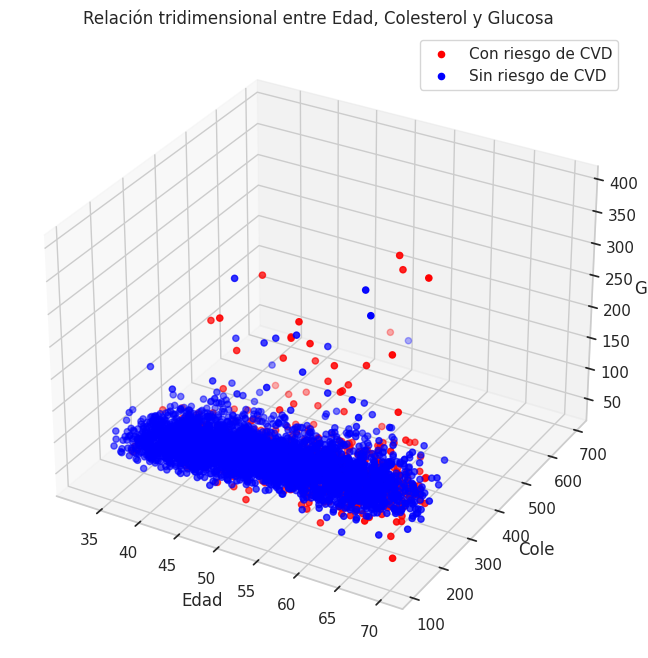

In [ ]:
# Filtrar datos relevantes
datos_tridimensionales = df_limpio[['Edad', 'Cole', 'Glu', 'riesgoCVD_10años']]

# Crear la figura y el subplot tridimensional
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Dividir datos según el valor de la variable objetivo
datos_con_riesgo = datos_tridimensionales[datos_tridimensionales['riesgoCVD_10años'] == 1]
datos_sin_riesgo = datos_tridimensionales[datos_tridimensionales['riesgoCVD_10años'] == 0]

# Variables para datos con y sin riesgo
x_riesgo = datos_con_riesgo['Edad']
y_riesgo = datos_con_riesgo['Cole']
z_riesgo = datos_con_riesgo['Glu']

x_sin_riesgo = datos_sin_riesgo['Edad']
y_sin_riesgo = datos_sin_riesgo['Cole']
z_sin_riesgo = datos_sin_riesgo['Glu']

# Graficar los puntos tridimensionales con diferentes colores
ax.scatter(x_riesgo, y_riesgo, z_riesgo, c='red', marker='o', label='Con riesgo de CVD')
ax.scatter(x_sin_riesgo, y_sin_riesgo, z_sin_riesgo, c='blue', marker='o', label='Sin riesgo de CVD')

# Etiquetas y título
ax.set_xlabel('Edad')
ax.set_ylabel('Cole')
ax.set_zlabel('Glu')
ax.set_title('Relación tridimensional entre Edad, Colesterol y Glucosa')
ax.legend()

# Mostrar el gráfico
plt.show()

**Observación:** En la gráfica tridimensional encontramos que existe una correlación positiva entre la edad y el IMC y a su vez a medida que el IMC, también aumenta el Glucosa, es decir el exceso de peso corporal puede aumentar la resistencia a la insulina, lo que puede conducir a la diabetes y posiblemente a sufrir de enfermedades coronarias.


# **7) Matriz de correlación**
Esta es una representación visual de datos donde los valores individuales de una matriz son representados como colores, de este modo podremos visualizar la intensidad de la interacción de las variables. Para ello vamos a hacer uso de la librería Seaborn de Python.

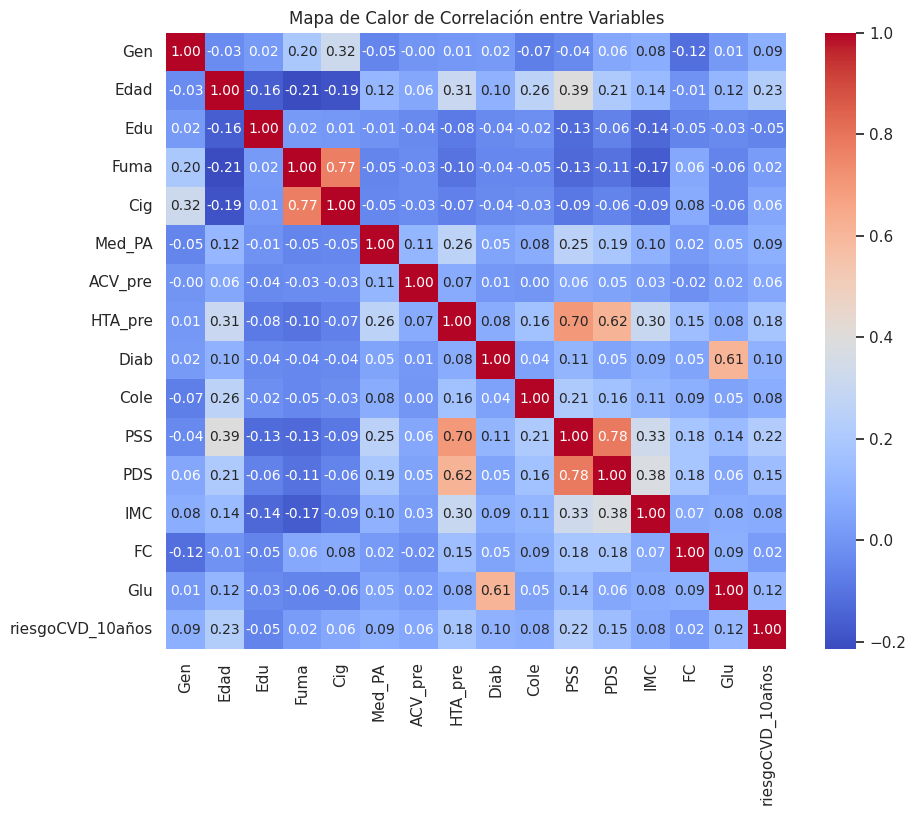

In [ ]:
# Creamos una matriz de correlación
correlation_matrix = df_limpio.corr()

# Creamos el heatmap con ajuste de tamaño de fuente
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()

**Observación:** De la matriz de correlación, se pueden visualizar las relaciones lineales entre las variables del conjunto de datos. hay una correlación positiva entre el hábito de fumar y el número de cigarrillos fumados diariamente. También se observa una correlación positiva entre la edad y la presión arterial sistólica, es decir, que a medida que aumenta la edad, también tiende a aumentar la presión arterial.
Las correlaciones más altas entre variables sin tener en cuenta la variable objeto son:
* El aumento de la edad está asociado con un mayor riesgo de desarrollar enfermedad cardíaca coronaria en la próxima década.
* La prevalencia de la hipertensión arterial se correlaciona positivamente con el riesgo de enfermedad cardíaca.
* Los niveles elevados de glucosa en sangre y la presencia de diabetes están asociados con un aumento del riesgo de enfermedad cardíaca.
Teniendo en cuenta: RiesgoCVD_10años, las variables más relacionadas con ella son:
* La frecuencia cardíaca (FC) presenta una correlación muy baja con el riesgo de enfermedad cardíaca coronaria a diez años; también, la correlación entre el género y el riesgo de enfermedad cardíaca coronaria a diez años también es baja (0,097878).
* La educación (Edu) muestra una correlación negativa con el riesgo de enfermedad cardíaca coronaria a diez años, lo que sugiere que niveles educativos más altos pueden estar asociados con un menor riesgo cardiovascular.
A continuación, el listado completo de mayor a menor de correlaciones:
1.  Edad: 0,306291
2.  PSS: 0,272166
3.  HTA_pre: 0,23897
4.  PDS: 0,190382
5.  Glu: 0,121369
6.  Diab: 0,12058
7.  Med_PA: 0,113351
8.  Gen: 0,097878
9.  Cole: 0,0801
10. ACV_pre: 0,069906
11. Cig: 0,069443
12. IMC: 0,066563
13. Fuma: 0,021741
14. FC: 0,004351
15. Edu: -0,055124




# **8) Relación entre medias.**

La "relación entre medias" en estadística implica comparar las medias de dos o más grupos o poblaciones para determinar si hay diferencias significativas entre ellas. la Relación entre medias se basa en la siguiente expresión:
**Media armónica < Media geométrica < Media aritmética.**

In [ ]:
# se calcula la media armónica
for columna in df.columns:
    # Calcular la media armónica de la columna actual
    media_arm = sp.hmean(df_limpio[columna])

# se calcula la media geométrica
for columna in df.columns:
    # Calcular la media geométrica de la columna actual
    media_geo = sp.gmean(df_limpio[columna])

# Se calcula la media aritmética
for columna in df.columns:
    # Calcular la media aritmética de la columna actual
    media_arit = df_limpio[columna].mean()

In [ ]:
for columna in df.columns:
    # Calcular la media armónica de la columna actual
    media_arm = sp.hmean(df[columna])

    # Calcular la media geométrica de la columna actual
    media_geo = sp.gmean(df[columna])

    # Calcular la media aritmética de la columna actual
    media_arit = df_limpio[columna].mean()

    # Verificar la relación entre medias
    if media_arm < media_geo and media_geo < media_arit:
        relacion = "media armónica < media geométrica < media aritmética"
    else:
        relacion = "La relación entre medias no se cumple"

    # Mostrar el nombre de la columna y la relación entre medias
    print("Para la columna '{}': {}".format(columna, relacion))

Para la columna 'Gen': La relación entre medias no se cumple
Para la columna 'Edad': media armónica < media geométrica < media aritmética
Para la columna 'Edu': La relación entre medias no se cumple
Para la columna 'Fuma': La relación entre medias no se cumple
Para la columna 'Cig': La relación entre medias no se cumple
Para la columna 'Med_PA': La relación entre medias no se cumple
Para la columna 'ACV_pre': La relación entre medias no se cumple
Para la columna 'HTA_pre': La relación entre medias no se cumple
Para la columna 'Diab': La relación entre medias no se cumple
Para la columna 'Cole': La relación entre medias no se cumple
Para la columna 'PSS': media armónica < media geométrica < media aritmética
Para la columna 'PDS': media armónica < media geométrica < media aritmética
Para la columna 'IMC': La relación entre medias no se cumple
Para la columna 'FC': La relación entre medias no se cumple
Para la columna 'Glu': La relación entre medias no se cumple
Para la columna 'riesgoCVD

***Observaciones:***
* Teniendo en cuenta la relación entre las medias armónicas, geométricas y aritméticas de cada variable del conjunto de datos, se puede concluir:

* Para las variables Edad, PSS y PDS, la media armónica es menor que la media geométrica, que a su vez es menor que la media aritmética, esto nos sugiere que hay una distribución sesgada hacia valores más bajos en estas variables.

* En cuanto a las variables Gen, Edu, Fuma, Cig, Med_PA, ACV_pre, HTA_pre, Diab, Cole, IMC, FC, Glu y riesgoCVD_10años, la relación entre las medias no se cumple indicando que la distribución de los datos en estas variables es más compleja y no sigue el mismo patrón que las anteriores. Entre estas, precisamente, se encuentran todas las variables binarias.

# **9) Rango intercuartílico. (IQR)**

Es la diferencia entre el tercer y el primer cuartil de una distribución. El IQR es útil en una regresión logística para evaluar la dispersión de los valores de una variable predictora, facilitando la identificación de la variabilidad de los datos y su impacto en la precisión del modelo.

In [ ]:
# Calcular el rango intercuartílico (IQR) para cada variable
iqr = df_limpio.quantile(0.75) - df_limpio.quantile(0.25)

# Ordenar las variables por su IQR en orden descendente
variables_mas_dispersas = iqr.sort_values(ascending=False)

print("Variables ordenadas por IQR (de mayor a menor dispersión):")
print(variables_mas_dispersas)

Variables ordenadas por IQR (de mayor a menor dispersión):
Cole                56.0000
PSS                 30.0000
Cig                 20.0000
PDS                 16.5000
FC                  15.0000
Glu                 15.0000
Edad                14.0000
IMC                  5.3925
Edu                  2.0000
Gen                  1.0000
Fuma                 1.0000
HTA_pre              1.0000
riesgoCVD_10años     1.0000
Med_PA               0.0000
ACV_pre              0.0000
Diab                 0.0000
dtype: float64


**Observación:**
Es la diferencia entre el tercer y el primer cuartil de una distribución. Un IQR más grande indica una mayor dispersión de los valores en una variable.

* Colesterol (Cole), Presión Sistólica (PSS) y Cigarrillos por día (Cig): tienen el mayor rango intercuartílico, lo que indica una mayor dispersión en los datos. Es decir , hay una variabilidad significativa en los niveles de colesterol, presión sistólica y consumo de cigarrillos entre los individuos de la muestra.

* Frecuencia Cardiaca (FC), Presión Diastólica (PDS), Edad, Glucosa (Glu) e  índice de masa corporal (IMC) tienen un menor IQR, lo que sugiere que la mayoría de los datos están concentrados en un rango estrecho, indicando una falta de variabilidad en estos datos o la presencia de valores atípicos que reducen el rango intercuartílico.

* Gen, Fuma, Med_PA, ACV_pre, HTA_pre, Diab y riesgoCVD_10años, son variables, son de naturaleza categórica y solo pueden tener dos valores posibles. 1 – 0, el IQR puede no proporcionar información útil debido a la naturaleza discreta de los datos.

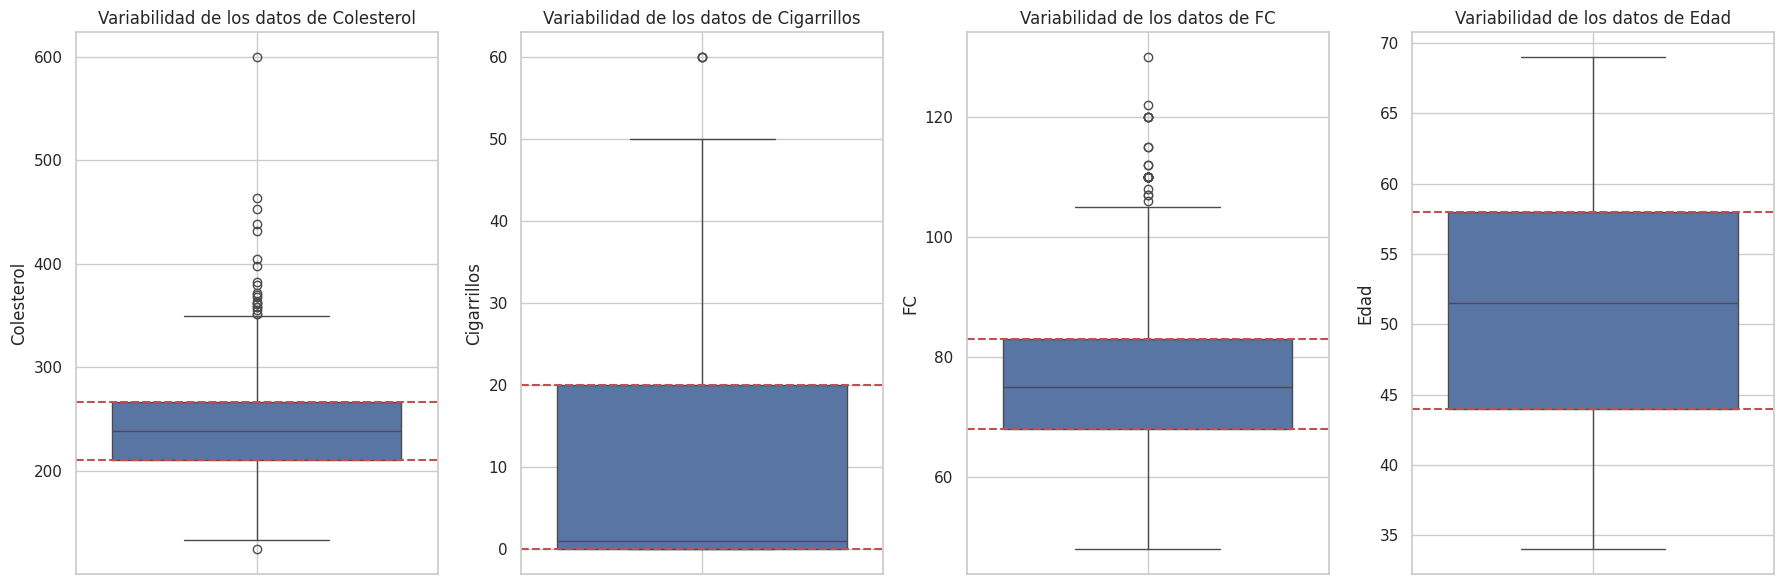

In [ ]:
# Configurar subplots
fig, axs = plt.subplots(1, 4, figsize=(18, 6))

# Crear gráfico de caja para Colesterol
sns.boxplot(df_limpio['Cole'], ax=axs[0], orient='v')
axs[0].set_title('Variabilidad de los datos de Colesterol')
axs[0].set_ylabel('Colesterol')
axs[0].grid(True)
# Calcular los cuartiles para Colesterol
Q1_cole = df_limpio['Cole'].quantile(0.25)
Q3_cole = df_limpio['Cole'].quantile(0.75)
# Agregar líneas para representar Q1 y Q3 para Colesterol
axs[0].axhline(Q1_cole, color='r', linestyle='--')
axs[0].axhline(Q3_cole, color='r', linestyle='--')

# Crear gráfico de caja para Cigarrillos
sns.boxplot(df_limpio['Cig'], ax=axs[1], orient='v')
axs[1].set_title('Variabilidad de los datos de Cigarrillos')
axs[1].set_ylabel('Cigarrillos')
axs[1].grid(True)
# Calcular los cuartiles para Cigarrillos
Q1_cig = df_limpio['Cig'].quantile(0.25)
Q3_cig = df_limpio['Cig'].quantile(0.75)
# Agregar líneas para representar Q1 y Q3 para Cigarrillos
axs[1].axhline(Q1_cig, color='r', linestyle='--')
axs[1].axhline(Q3_cig, color='r', linestyle='--')

# Crear gráfico de caja para FC
sns.boxplot(df_limpio['FC'], ax=axs[2], orient='v')
axs[2].set_title('Variabilidad de los datos de FC')
axs[2].set_ylabel('FC')
axs[2].grid(True)
# Calcular los cuartiles para FC
Q1_fc = df_limpio['FC'].quantile(0.25)
Q3_fc = df_limpio['FC'].quantile(0.75)
# Agregar líneas para representar Q1 y Q3 para FC
axs[2].axhline(Q1_fc, color='r', linestyle='--')
axs[2].axhline(Q3_fc, color='r', linestyle='--')

# Crear gráfico de caja para Edad
sns.boxplot(df_limpio['Edad'], ax=axs[3], orient='v')
axs[3].set_title('Variabilidad de los datos de Edad')
axs[3].set_ylabel('Edad')
axs[3].grid(True)
# Calcular los cuartiles para Edad
Q1_edad = df_limpio['Edad'].quantile(0.25)
Q3_edad = df_limpio['Edad'].quantile(0.75)
# Agregar líneas para representar Q1 y Q3 para Edad
axs[3].axhline(Q1_edad, color='r', linestyle='--')
axs[3].axhline(Q3_edad, color='r', linestyle='--')

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

**Observación:** Estas graficas confirman los valores calculados, elegí graficar cuatro variables significativas para el estudio con altos niveles de variabilidad, en cuanto al Colesterol es la variable con mayor variabilidad, teniendo en cuenta que los niveles de colesterol normales oscilan entre 125 a 200 mg/dL en sangre, esta grafica nos confirma que hay un importante número de individuos de la población estudiada que tiene niveles altos de colesterol, sin embargo los datos cubren un rango muy amplio incluso con  un significativo número de valores atípicos altos, de igual manera FC tiene una gran cantidad de valores atípicos, con la cantidad de Cigarrillos por día se presenta algo particular, si bien el rango es acorde a la realidad iniciando desde cero tiene un parde valores atípicos muy altos de 70 y 60 muy por encima tercer cuartil, finalmente la mayor parte de la población estudiada está en un rango amplio que oscila entre los 42 y 56 años aproximadamente.  

# **10) Cuantiles**
Los cuantiles en la regresión logística son útiles para identificar umbrales de riesgo, evaluar la distribución de los datos, detectar valores atípicos y comparar grupos o subpoblaciones.

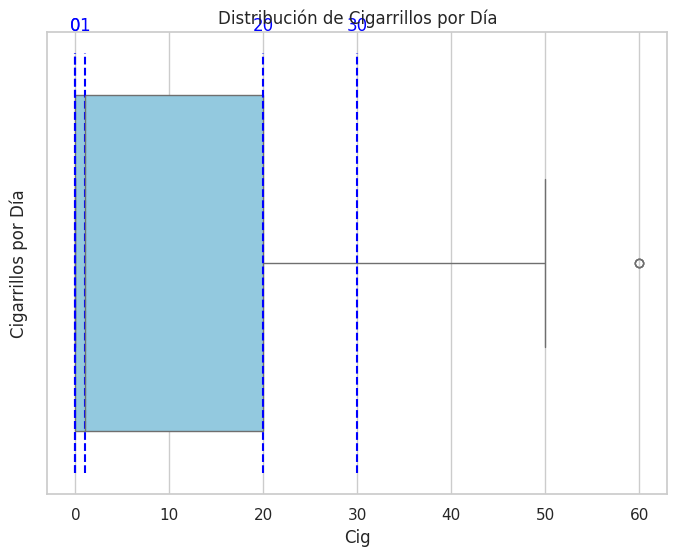

In [ ]:
# Configurar subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar el boxplot de Cigarrillos por Día
sns.boxplot(x=df_limpio["Cig"], color='skyblue', ax=ax)

# Obtención de los cuantiles
cuantiles = df_limpio["Cig"].quantile([0.10, 0.25, 0.50, 0.75, 0.90])

# Graficar las líneas de los cuantiles
ax.vlines(cuantiles.values, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='blue', linestyle='--')

# Añadir etiquetas de los cuantiles
for i, quantile in enumerate(cuantiles):
    ax.text(quantile, ax.get_ylim()[1] * 1.01, f'{quantile:.0f}', horizontalalignment='center', color='blue')

# Añadir etiquetas y título
ax.set_ylabel('Cigarrillos por Día')
ax.set_title('Distribución de Cigarrillos por Día')

# Mostrar el gráfico
plt.show()

**Observación:** Los cuantiles muestran que al menos el 50% de los datos de "Cig" son 0 o inferiores, lo que sugiere que hay una alta proporción de registros con 0 cigarrillos al día. El hecho de que el percentil 75 sea 20 y el percentil 90 sea 25 indica que la mayoría de los valores distintos de 0 están concentrados en la parte superior de la distribución, mientras que la mayor parte de los datos se encuentran en la parte inferior, donde los valores son 0.

Esto es coherente con la idea de que la mayoría de las personas en el conjunto de datos no fuman o fuman muy poco, pero hay algunos individuos que fuman una cantidad significativa de cigarrillos al día.

# **11) Asimetría**

Este coeficiente proporciona información sobre la simetría de la distribución de una variable. Un valor cercano a 0 indica que la distribución es aproximadamente simétrica, mientras que valores positivos indican una cola hacia la derecha (sesgo positivo) y valores negativos indican una cola hacia la izquierda (sesgo negativo).


In [ ]:
# podemos visualizar el coeficiente de asimetría para todas las variables del dataset
df_limpio.skew()

Gen                  0.127190
Edad                -0.026121
Edu                  0.753595
Fuma                -0.003173
Cig                  1.122500
Med_PA               4.523683
ACV_pre             10.120260
HTA_pre              0.371151
Diab                 4.725921
Cole                 0.976425
PSS                  1.044492
PDS                  0.663983
IMC                  1.036879
FC                   0.718587
Glu                  5.659820
riesgoCVD_10años     0.000000
dtype: float64

**Observación:** Las variables: ['Gen', 'Fuma', 'Med_PA', 'ACV_pre', 'HTA_pre', 'Diab', 'riesgoCVD_10años’] tienden a tener distribuciones asimétricas, ya que solo pueden tomar dos valores posibles.
Cig y Glu muestran un sesgo positivo con coeficientes de asimetría mayores que 1, es decir tienden a tener una concentración de valores más bajos y algunos valores extremadamente altos.
Presión Diastólica (PDS) tiene un sesgo negativo con un coeficiente de asimetría ligeramente menor que 0, esto indica una concentración de valores más altos y algunos valores extremadamente bajos.
Edad, Edu, Cole, IMC y FC tienen coeficientes de asimetría cercanos a 0, por lo tanto,  una distribución aproximadamente simétrica, es decir más equilibrada en términos de valores bajos y altos.

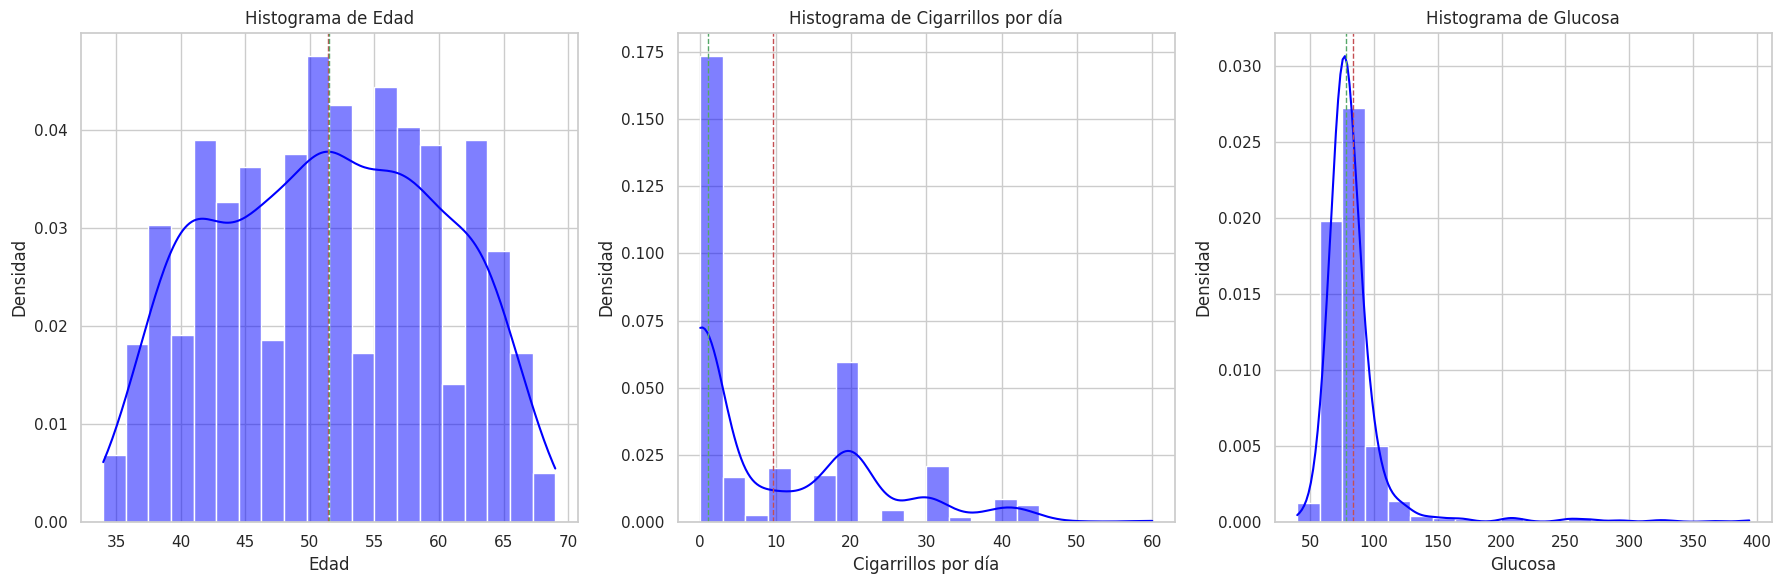

In [ ]:
# Configurar subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Crear histograma con KDE para la variable 'Edad'
sns.histplot(df_limpio['Edad'], color="blue", bins=20, kde=True, stat="density", linewidth=1, ax=axs[0])
# Línea vertical para la media
axs[0].axvline(df_limpio['Edad'].mean(), color='r', linestyle='dashed', linewidth=1)
# Línea vertical para la mediana
axs[0].axvline(df_limpio['Edad'].median(), color='g', linestyle='dashed', linewidth=1)
# Título del gráfico
axs[0].set_title('Histograma de Edad')
axs[0].set_xlabel('Edad')
axs[0].set_ylabel('Densidad')
axs[0].grid(True)

# Crear histograma con KDE para la variable 'Cig'
sns.histplot(df_limpio['Cig'], color="blue", bins=20, kde=True, stat="density", linewidth=1, ax=axs[1])
# Línea vertical para la media
axs[1].axvline(df_limpio['Cig'].mean(), color='r', linestyle='dashed', linewidth=1)
# Línea vertical para la mediana
axs[1].axvline(df_limpio['Cig'].median(), color='g', linestyle='dashed', linewidth=1)
# Título del gráfico
axs[1].set_title('Histograma de Cigarrillos por día')
axs[1].set_xlabel('Cigarrillos por día')
axs[1].set_ylabel('Densidad')
axs[1].grid(True)

# Crear histograma con KDE para la variable 'Glu'
sns.histplot(df_limpio['Glu'], color="blue", bins=20, kde=True, stat="density", linewidth=1, ax=axs[2])
# Línea vertical para la media
axs[2].axvline(df_limpio['Glu'].mean(), color='r', linestyle='dashed', linewidth=1)
# Línea vertical para la mediana
axs[2].axvline(df_limpio['Glu'].median(), color='g', linestyle='dashed', linewidth=1)
# Título del gráfico
axs[2].set_title('Histograma de Glucosa')
axs[2].set_xlabel('Glucosa')
axs[2].set_ylabel('Densidad')
axs[2].grid(True)

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

**Observación:** Estas graficas nos muestran las distribuciones de las variables a través de sus histogramas, La distribución de la Edad parece ser aproximadamente simétrica, como lo sugiere su coeficiente de asimetría cercano a cero. Si bien hay un pequeño sobresalto en las edades cercanas a los 38 años, no hay una tendencia clara hacia valores más bajos o más altos. Considero que puede ser una señal positiva en términos de representatividad de la muestra, ya que no hay una concentración inusual de edades específicas. La distribución de Cigarrillos por día muestra un sesgo positivo pronunciado, la mayoría de los individuos en el conjunto de datos fuman pocos cigarrillos al día, pero hay algunos individuos que fuman una cantidad significativamente mayor.
La distribución de Glucosa también muestra un sesgo positivo la mayoría de los individuos tienen niveles de glucosa en sangre relativamente bajos, pero hay algunos individuos con niveles extremadamente altos.

# **12) Curtosis**

La curtosis es una medida estadística que describe la concentración de los valores en una distribución de datos, indicando la agudeza de la distribución, permite comprender la concentración de valores alrededor de la media.


In [ ]:
curtosis_result = sp.kurtosis(df_limpio)

# Nombre de las variables
variables = df_limpio.columns

# Imprimir el nombre de cada variable y su curtosis correspondiente
for variable, curtosis in zip(variables, curtosis_result):
    print(f"{variable}: {curtosis}")

Gen: -1.983861247071699
Edad: -1.022635625728366
Edu: -0.6277466468472941
Fuma: -1.999989953787422
Cig: 0.4422918606588877
Med_PA: 18.415072357125336
ACV_pre: 100.17626666666672
HTA_pre: -1.8625745578485768
Diab: 20.28125412541254
Cole: 4.043315276050908
PSS: 1.8385667806372243
PDS: 0.8440880006959897
IMC: 3.136811315373679
FC: 0.786927250141904
Glu: 40.99429881788791
riesgoCVD_10años: -2.0


In [ ]:
# se implementa el coeficiente de fisher para aproximar la curtósis a 3.
sp.kurtosis(df_limpio,fisher=False)

array([  1.01613875,   1.97736437,   2.37225335,   1.00001005,
         3.44229186,  21.41507236, 103.17626667,   1.13742544,
        23.28125413,   7.04331528,   4.83856678,   3.844088  ,
         6.13681132,   3.78692725,  43.99429882,   1.        ])

**Observación:**
* Platicúrtica: Edad y Edu tienen valores de curtosis negativos, lo que indica que sus distribuciones son relativamente planas en comparación con una distribución normal estándar.

* Leptocúrtica: Cig, Cole, PSS, PDS, IMC y FC tienen valores de curtosis positivos, lo que sugiere que tienen colas más pesadas y puntiagudas en comparación con una distribución normal.

* Glu también es Leptocúrtica pero tiene un valor de curtosis muy alto en comparación con las demás variables, lo que indica una distribución muy puntiaguda con colas extremadamente pesadas.


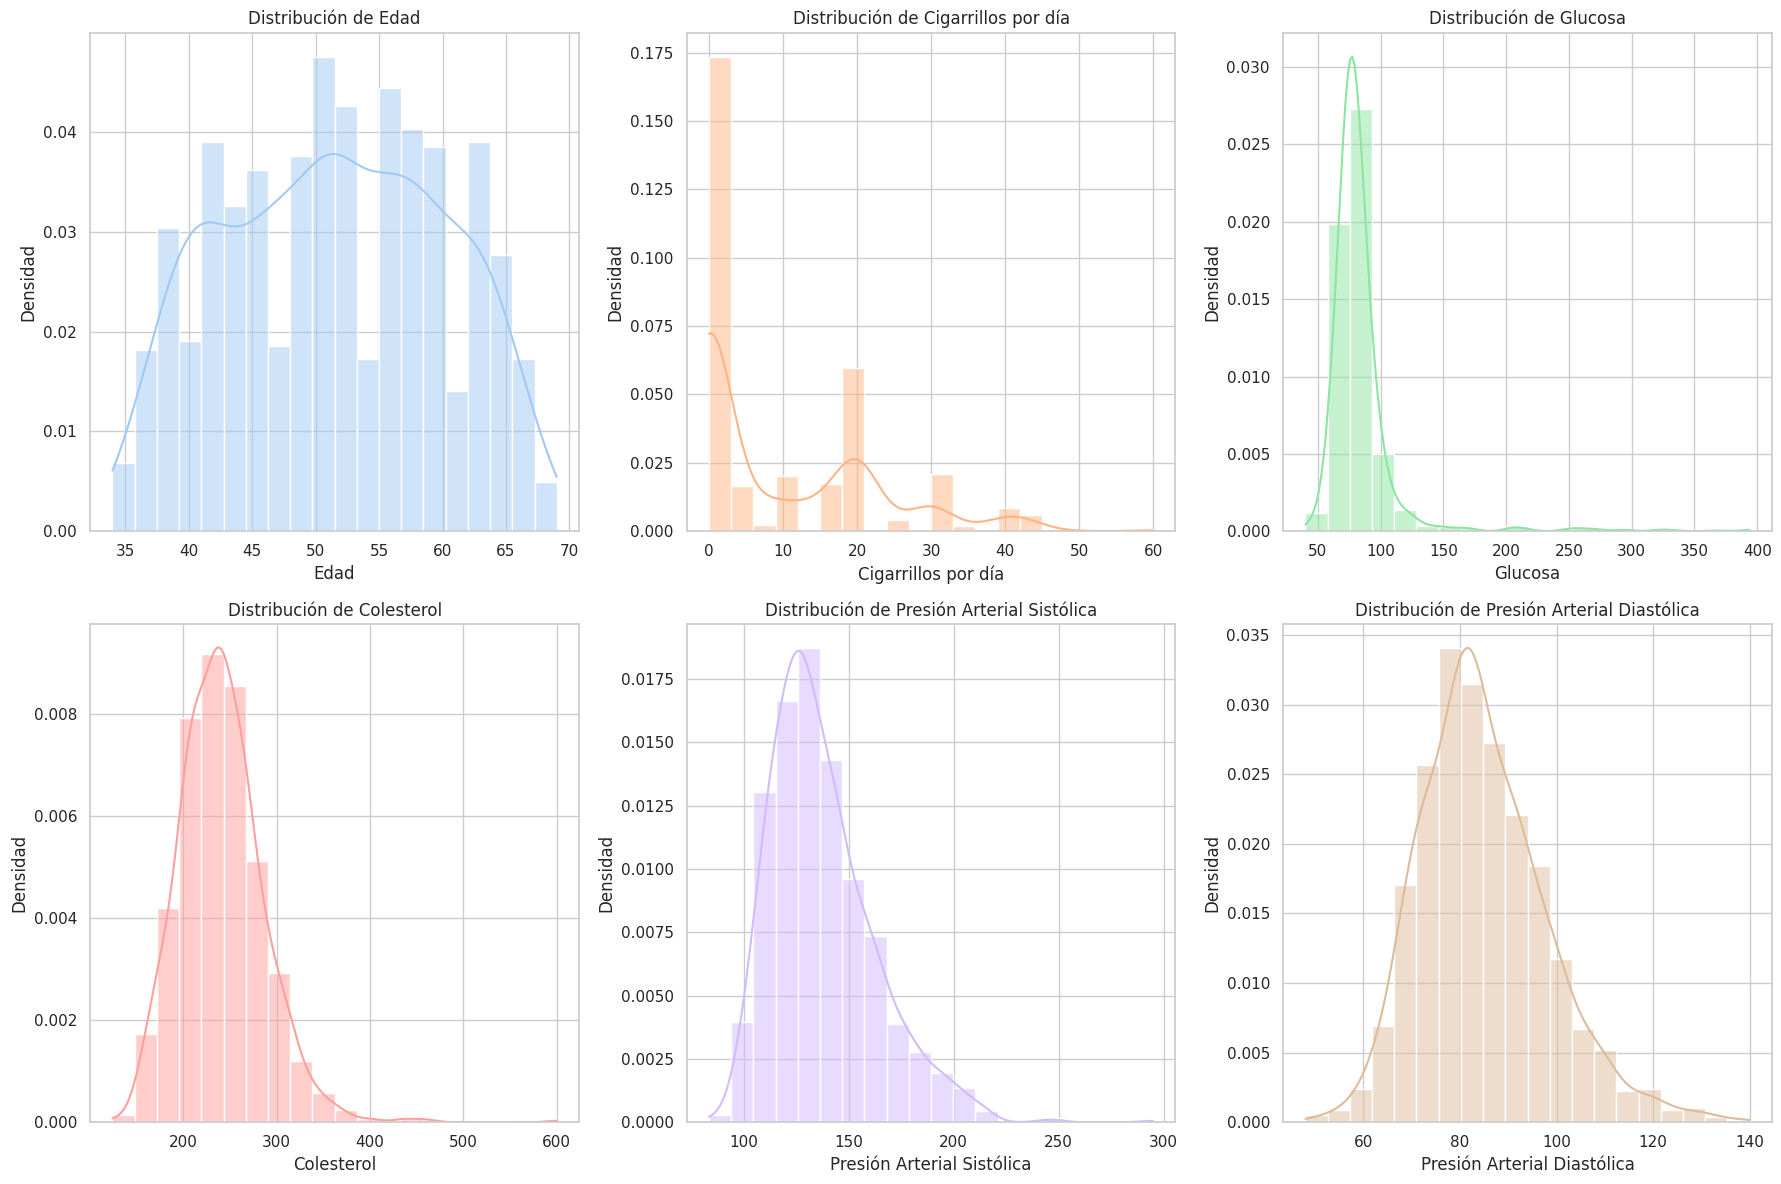

In [ ]:
# Configurar subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Color pastel
pastel_colors = sns.color_palette("pastel")

# Visualización de la función de densidad para 'Edad'
sns.histplot(df_limpio["Edad"], ax=axs[0, 0], color=pastel_colors[0], bins=20, kde=True, stat="density", linewidth=1)
axs[0, 0].set_title('Distribución de Edad')
axs[0, 0].set_xlabel('Edad')
axs[0, 0].set_ylabel('Densidad')
axs[0, 0].grid(True)

# Visualización de la función de densidad para 'Cig'
sns.histplot(df_limpio["Cig"], ax=axs[0, 1], color=pastel_colors[1], bins=20, kde=True, stat="density", linewidth=1)
axs[0, 1].set_title('Distribución de Cigarrillos por día')
axs[0, 1].set_xlabel('Cigarrillos por día')
axs[0, 1].set_ylabel('Densidad')
axs[0, 1].grid(True)

# Visualización de la función de densidad para 'Glu' (Glucosa)
sns.histplot(df_limpio["Glu"], ax=axs[0, 2], color=pastel_colors[2], bins=20, kde=True, stat="density", linewidth=1)
axs[0, 2].set_title('Distribución de Glucosa')
axs[0, 2].set_xlabel('Glucosa')
axs[0, 2].set_ylabel('Densidad')
axs[0, 2].grid(True)

# Visualización de la función de densidad para 'Cole' (Colesterol)
sns.histplot(df_limpio["Cole"], ax=axs[1, 0], color=pastel_colors[3], bins=20, kde=True, stat="density", linewidth=1)
axs[1, 0].set_title('Distribución de Colesterol')
axs[1, 0].set_xlabel('Colesterol')
axs[1, 0].set_ylabel('Densidad')
axs[1, 0].grid(True)

# Visualización de la función de densidad para 'PSS' (Presión Arterial Sistólica)
sns.histplot(df_limpio["PSS"], ax=axs[1, 1], color=pastel_colors[4], bins=20, kde=True, stat="density", linewidth=1)
axs[1, 1].set_title('Distribución de Presión Arterial Sistólica')
axs[1, 1].set_xlabel('Presión Arterial Sistólica')
axs[1, 1].set_ylabel('Densidad')
axs[1, 1].grid(True)

# Visualización de la función de densidad para 'PDS' (Presión Arterial Diastólica)
sns.histplot(df_limpio["PDS"], ax=axs[1, 2], color=pastel_colors[5], bins=20, kde=True, stat="density", linewidth=1)
axs[1, 2].set_title('Distribución de Presión Arterial Diastólica')
axs[1, 2].set_xlabel('Presión Arterial Diastólica')
axs[1, 2].set_ylabel('Densidad')
axs[1, 2].grid(True)

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

**Observación:** Estas graficas nos confirman nuestras apreciaciones sobre curtosis:

* Edad: Platicúrtica
* Cigarrillos por día: Leptocúrtica
* Glucosa: Leptocúrtica
* Colesterol: Leptocúrtica
* Presión Sistólica: Leptocúrtica
* Presión Diastólica: Leptocúrtica

# **13) Desviación media**
La Desviación Media Absoluta es una medida que indica cuánto, en promedio, los valores de una variable se desvían de su media.


In [ ]:
# Calcular la desviación media absoluta (MAD) para cada columna
mad_values = (df_limpio - df_limpio.mean()).abs().mean()

print("Desviación Media Absoluta (MAD) de cada columna:")
print(mad_values)

Desviación Media Absoluta (MAD) de cada columna:
Gen                  0.497991
Edad                 7.306656
Edu                  0.824892
Fuma                 0.499999
Cig                 10.636461
Med_PA               0.081917
ACV_pre              0.018837
HTA_pre              0.483392
Diab                 0.076100
Cole                34.569154
PSS                 19.320360
PDS                 10.211592
IMC                  3.226625
FC                   9.517693
Glu                 14.546972
riesgoCVD_10años     0.500000
dtype: float64


**Observación:** Para la variable "Cig", la MAD es aproximadamente 10.07, por lo tanto, en promedio los valores "Cig" se desvían alrededor de 10.07 unidades de su media. Cuanto mayor sea MAD, mayor será la dispersión de los datos alrededor de la media y por ende una mayor variabilidad en los valores de esa variable.


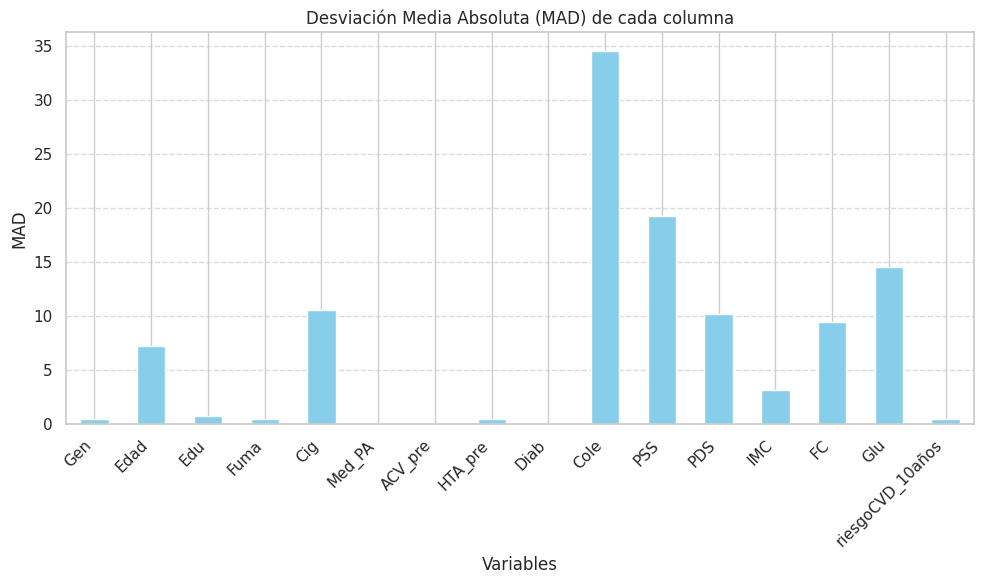

In [ ]:
# Calcular la Desviación Media Absoluta (MAD) de cada columna
mad_values = (df_limpio - df_limpio.mean()).abs().mean()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
mad_values.plot(kind='bar', color='skyblue')
plt.title('Desviación Media Absoluta (MAD) de cada columna')
plt.xlabel('Variables')
plt.ylabel('MAD')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Observación:**
* La mayor variabilidad se observa en la columna de Colesterol (34.21), seguida de Presión Sistólica (PSS) con un valor de 16.83, estos dos atributos tienen una dispersión relativamente alta en comparación con otros.

* Las variables Edad, Cigarrillos por día (Cig) y Glucosa (Glu) también muestran una variabilidad considerable, con valores de MAD de 7.32, 10.07 y 11.53 respectivamente.

* Edu e IMC muestran la menor variabilidad con valores de MAD de 0.80 y 3.10 respectiva mentepor lo tanto están relativamente más concentrados alrededor de sus medias.


# **14) Varianza**
La cuasi-varianza es una medida de dispersión que indica cuánto varían los valores de una variable alrededor de su media, pero sin tener en cuenta la media misma.

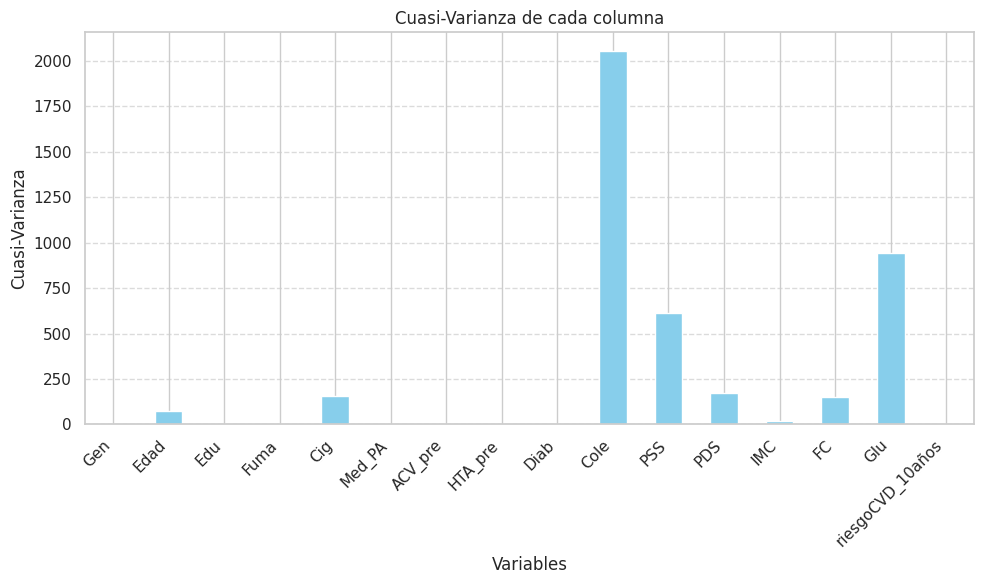

In [ ]:
# Calcular la cuasi-varianza de cada columna
cuasi_varianza = df_limpio.var()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
cuasi_varianza.plot(kind='bar', color='skyblue')
plt.title('Cuasi-Varianza de cada columna')
plt.xlabel('Variables')
plt.ylabel('Cuasi-Varianza')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Observación:** La mayor variabilidad se observa en la columna de Colesterol (1963.82), seguida de Glucosa (Glu) con un valor de 515.94 y Presión Sistólica (PSS) con 482.74. Estas variables tienen una dispersión considerablemente alta en comparación con otras.

Edad también muestra una variabilidad significativa con una cuasi-varianza de 73.40, esto sugiere una dispersión considerable en las edades de la muestra.

Las variables ACV_pre, HTA_pre y riesgoCVD_10años muestran una cuasi-varianza muy baja, lo que indica que están relativamente concentradas alrededor de sus medias.


# **15) Desviación típica**
La desviación típica es una medida estadística que indica la dispersión de los datos alrededor de la media en un conjunto de datos.


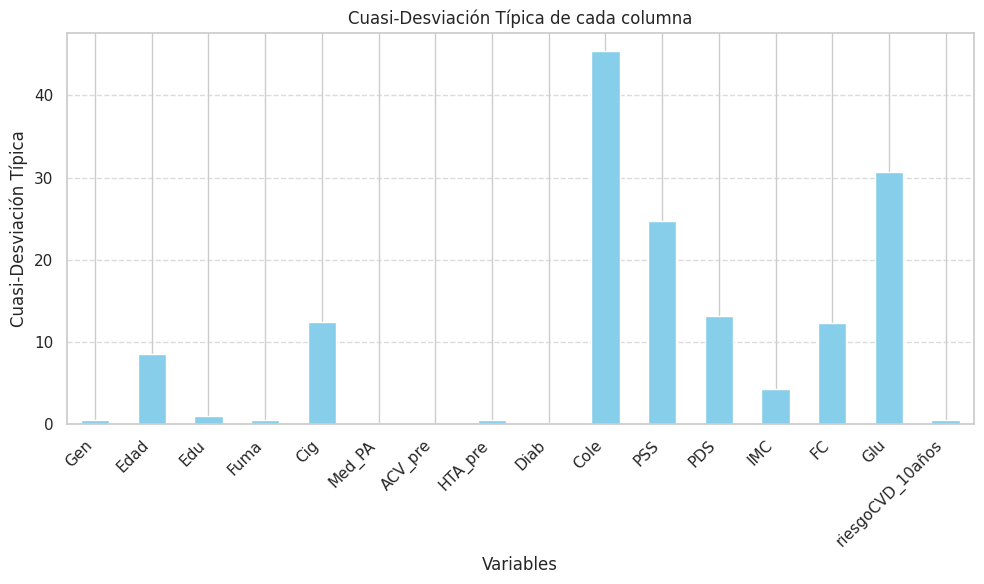

In [ ]:
# Calcular la cuasi-desviación típica de cada columna
cuasi_desviacion = df_limpio.std()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
cuasi_desviacion.plot(kind='bar', color='skyblue')
plt.title('Cuasi-Desviación Típica de cada columna')
plt.xlabel('Variables')
plt.ylabel('Cuasi-Desviación Típica')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Observación**
* La mayor dispersión se observa en la columna de Colesterol (44.32), seguida de Glucosa (Glu) con un valor de 22.71 y Presión Sistólica (PSS) con 21.97. Esto indica que estas variables tienen una variabilidad considerable en comparación con otras.

* Edad también muestra una desviación típica significativa con un valor de 8.57.

* ACV_pre, HTA_pre y riesgoCVD_10años muestran una cuasi-desviación típica relativamente baja, por lo tanto, se intuye que están relativamente concentradas alrededor de sus medias.

# **16) Covarianza**


La covarianza es una medida estadística que indica el grado de variación conjunta entre dos variables, es decir, cómo varían juntas en relación con sus medias.
Los valores de covarianza presentados en la matriz indican la relación entre las variables. Los valores positivos indican una tendencia de crecimiento conjunto entre las variables, mientras que los negativos indican una tendencia decreciente.


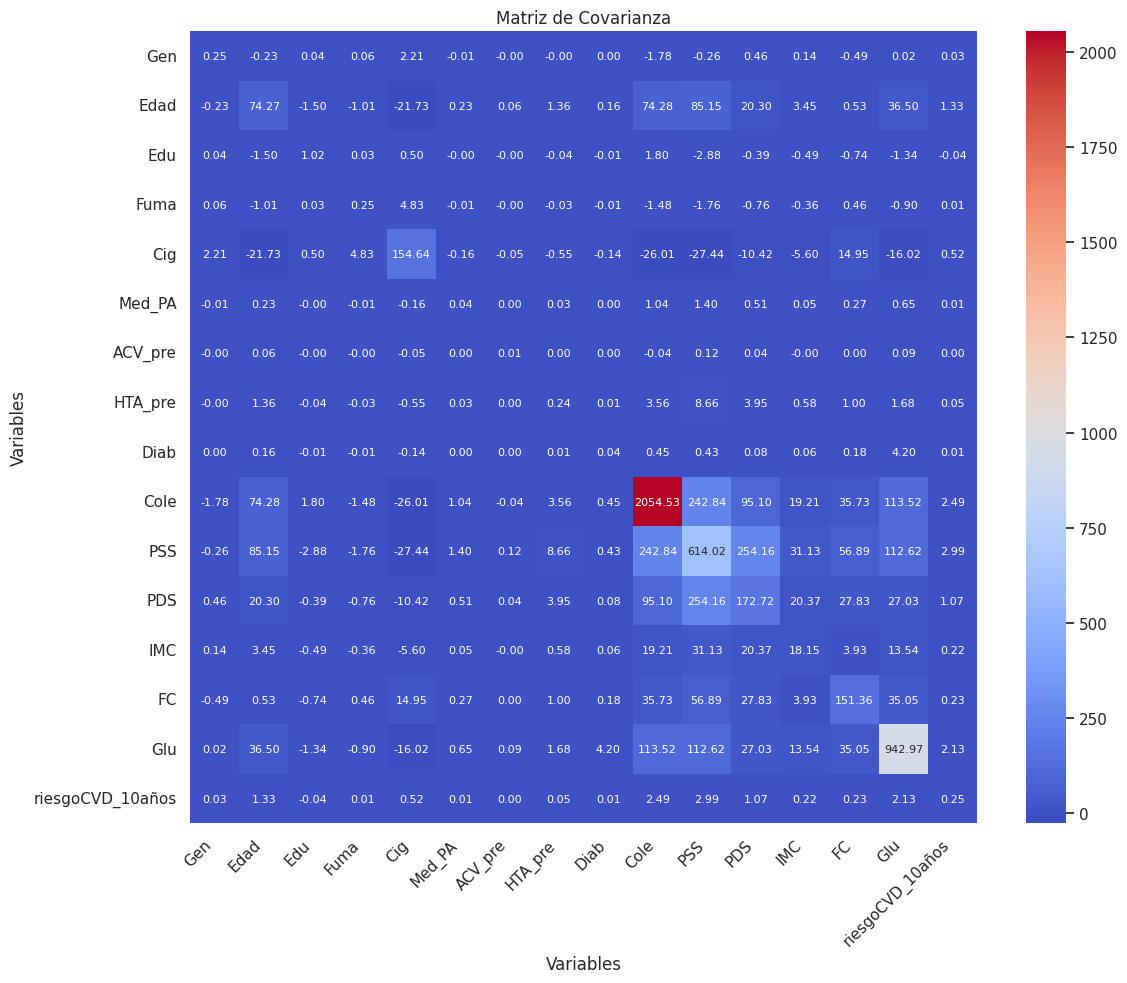

In [ ]:
# Calcular la matriz de covarianza
covariance_matrix = df_limpio.cov()

# Crear el mapa de calor (heatmap) de la matriz de covarianza
plt.figure(figsize=(12, 10))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Matriz de Covarianza')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Mostrar el mapa de calor
plt.show()

**Observación:** En la gráfica se muestra un valor  positivo atípicamente alto  para la varianza en este caso entre la variable Cole y sí misma, así mismo confirma la relación covarianza positiva entre presión Diastólica y Sistólica, un valor negativo para la relación covarianza entre cigarrillos y colesterol y una relación positiva entre edad y colesterol, me permitiré graficar cada una de estas relaciones para poder entender mejor la distribución.

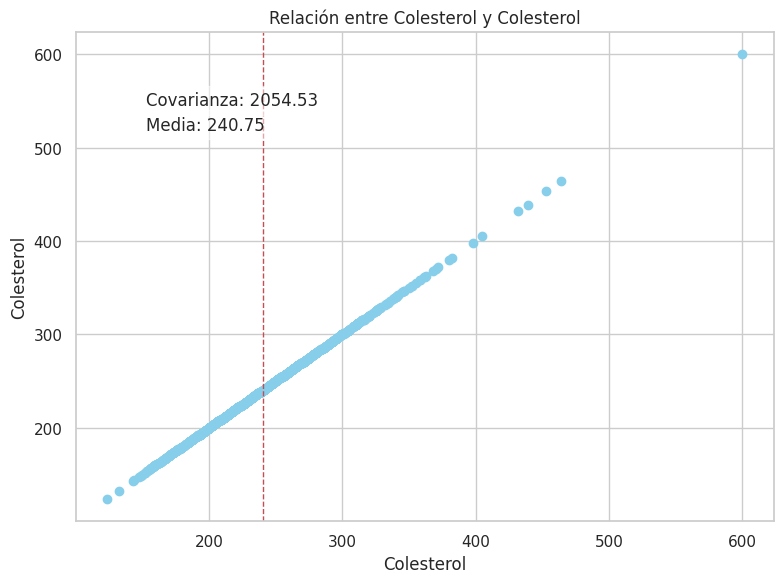

In [ ]:
# Calcular la covarianza entre 'Colesterol' y 'Colesterol' (que es simplemente la varianza)
covariance = df_limpio['Cole'].cov(df_limpio['Cole'])

# Calcular la media del colesterol
mean_colesterol = df_limpio['Cole'].mean()

# Graficar la relación entre 'Colesterol' y 'Colesterol' con un punto
plt.figure(figsize=(8, 6))
plt.scatter(df_limpio['Cole'], df_limpio['Cole'], color='skyblue')

# Añadir el valor de covarianza y la media al gráfico
plt.text(0.1, 0.85, f'Covarianza: {covariance:.2f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.1, 0.80, f'Media: {mean_colesterol:.2f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Añadir la línea vertical para la media del colesterol
plt.axvline(mean_colesterol, color='r', linestyle='dashed', linewidth=1)

plt.title('Relación entre Colesterol y Colesterol')
plt.xlabel('Colesterol')
plt.ylabel('Colesterol')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Observación:** Una varianza de 2054.53 de la variable colesterol indica una alta dispersión de los datos alrededor de su media. Por lo tanto, sus valores tienden a variar considerablemente entre sí, lo que sugiere una gran heterogeneidad en los niveles de colesterol en la muestra.

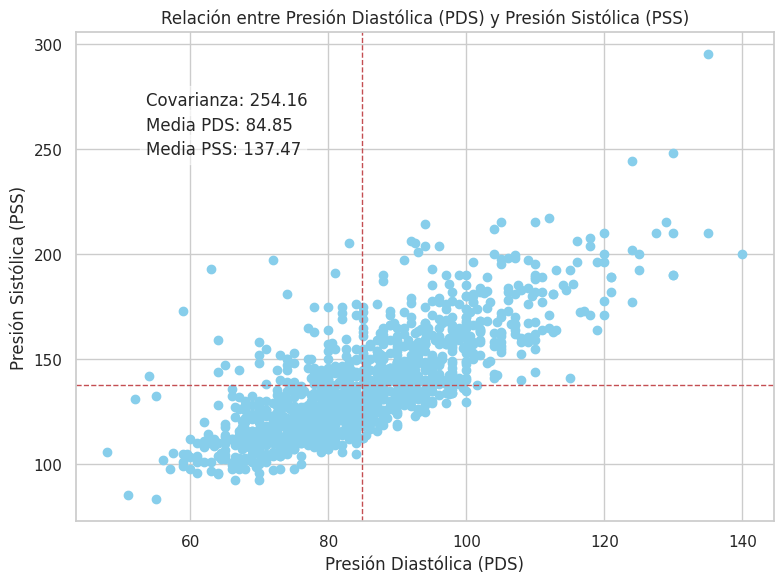

In [ ]:
# Calcular la covarianza entre 'PDS' y 'PSS'
covariance = df_limpio['PDS'].cov(df_limpio['PSS'])

# Calcular la media de PDS y PSS
mean_pds = df_limpio['PDS'].mean()
mean_pss = df_limpio['PSS'].mean()

# Graficar la relación entre 'PDS' y 'PSS' con un punto
plt.figure(figsize=(8, 6))
plt.scatter(df_limpio['PDS'], df_limpio['PSS'], color='skyblue')

# Añadir el valor de covarianza al gráfico
plt.text(0.1, 0.85, f'Covarianza: {covariance:.2f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Añadir la media de PDS y PSS al gráfico
plt.text(0.1, 0.80, f'Media PDS: {mean_pds:.2f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.1, 0.75, f'Media PSS: {mean_pss:.2f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Añadir líneas verticales y horizontales para las medias de PDS y PSS
plt.axvline(mean_pds, color='r', linestyle='dashed', linewidth=1)
plt.axhline(mean_pss, color='r', linestyle='dashed', linewidth=1)

plt.title('Relación entre Presión Diastólica (PDS) y Presión Sistólica (PSS)')
plt.xlabel('Presión Diastólica (PDS)')
plt.ylabel('Presión Sistólica (PSS)')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Observación:** La covarianza positiva de 254.16 entre PDS (Presión Diastólica) y PSS (Presión Sistólica) indica que cuando una variable aumenta, la otra tiende a aumentar también, y viceversa. Esto sugiere una relación positiva entre las dos variables, lo que significa que a medida que la presión diastólica de una persona aumenta, es probable que su presión sistólica también aumente.

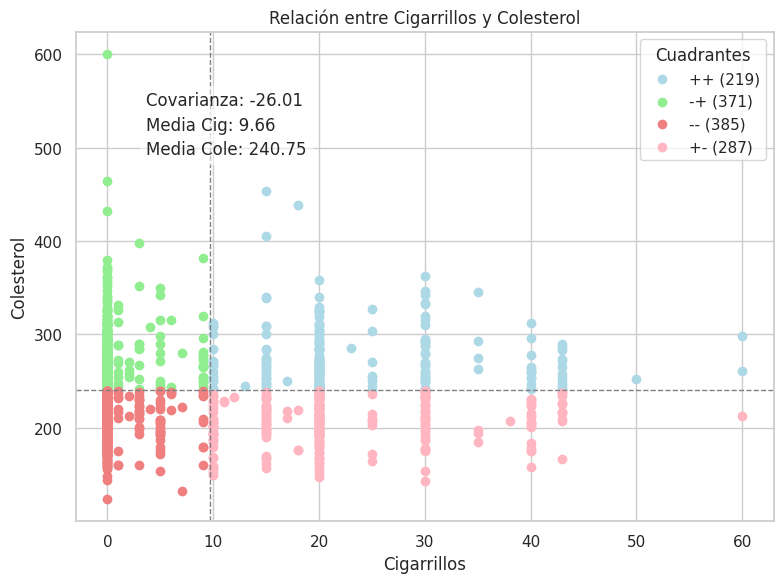

In [ ]:
# Calcular la covarianza entre 'Cig' y 'Cole'
covariance = df_limpio['Cig'].cov(df_limpio['Cole'])

# Calcular la media de Cig y Cole
mean_cig = df_limpio['Cig'].mean()
mean_cole = df_limpio['Cole'].mean()

# Definir los límites para los cuadrantes
x_mean = df_limpio['Cig'].mean()
y_mean = df_limpio['Cole'].mean()

# Definir colores pastel para cada cuadrante
colors = {'++': 'lightblue', '-+': 'lightgreen', '--': 'lightcoral', '+-': 'lightpink'}

# Dividir los puntos en cada cuadrante y asignarles un color específico
quadrants = {
    '++': df_limpio[(df_limpio['Cig'] > x_mean) & (df_limpio['Cole'] > y_mean)],
    '-+': df_limpio[(df_limpio['Cig'] <= x_mean) & (df_limpio['Cole'] > y_mean)],
    '--': df_limpio[(df_limpio['Cig'] <= x_mean) & (df_limpio['Cole'] <= y_mean)],
    '+-': df_limpio[(df_limpio['Cig'] > x_mean) & (df_limpio['Cole'] <= y_mean)]
}

# Graficar la relación entre 'Cig' y 'Cole' con un punto para cada cuadrante
plt.figure(figsize=(8, 6))
for quadrant, data in quadrants.items():
    plt.scatter(data['Cig'], data['Cole'], color=colors[quadrant], label=f'{quadrant} ({len(data)})')

# Añadir el valor de covarianza al gráfico
plt.text(0.1, 0.85, f'Covarianza: {covariance:.2f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Añadir la media de Cig y Cole al gráfico
plt.text(0.1, 0.80, f'Media Cig: {mean_cig:.2f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.1, 0.75, f'Media Cole: {mean_cole:.2f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Añadir líneas verticales y horizontales para las medias de Cig y Cole
plt.axvline(mean_cig, color='gray', linestyle='dashed', linewidth=1)
plt.axhline(mean_cole, color='gray', linestyle='dashed', linewidth=1)

# Agregar la leyenda de los cuadrantes
plt.legend(title='Cuadrantes')

plt.title('Relación entre Cigarrillos y Colesterol')
plt.xlabel('Cigarrillos')
plt.ylabel('Colesterol')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Observación:** Una covarianza negativa entre cigarrillos y colesterol de
-26.01 indica una relación inversa entre estas dos variables en el conjunto de datos. Este es un dato un tanto peculiar ya que significa que, en promedio, a medida que el número de cigarrillos fumados por día aumenta, los niveles de colesterol tienden a disminuir, y viceversa, considero que descarta una relación directa entre estas variables por lo cual no se debería tener en cuenta una relación entre estas.

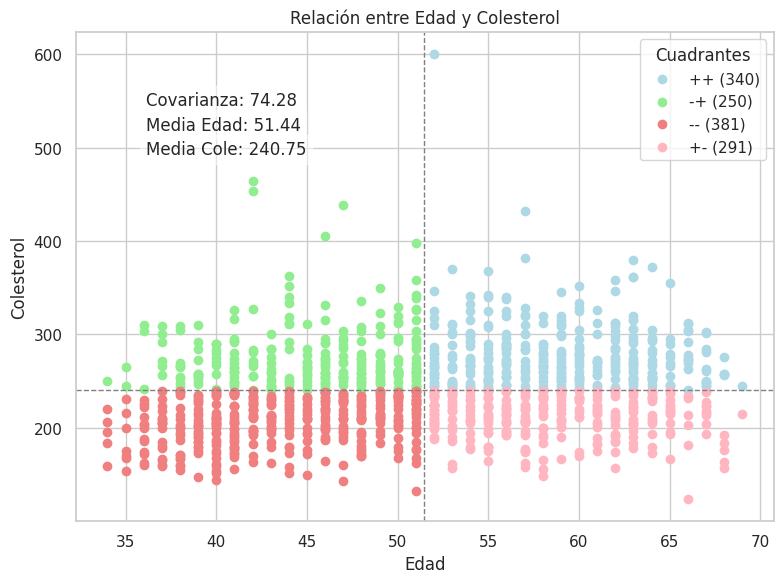

In [ ]:
# Calcular la covarianza entre 'Edad' y 'Cole'
covariance = df_limpio['Edad'].cov(df_limpio['Cole'])

# Calcular la media de Edad y Cole
mean_edad = df_limpio['Edad'].mean()
mean_cole = df_limpio['Cole'].mean()

# Definir los límites para los cuadrantes
x_mean = df_limpio['Edad'].mean()
y_mean = df_limpio['Cole'].mean()

# Definir colores pastel para cada cuadrante
colors = {'++': 'lightblue', '-+': 'lightgreen', '--': 'lightcoral', '+-': 'lightpink'}

# Dividir los puntos en cada cuadrante y asignarles un color específico
quadrants = {
    '++': df_limpio[(df_limpio['Edad'] > x_mean) & (df_limpio['Cole'] > y_mean)],
    '-+': df_limpio[(df_limpio['Edad'] <= x_mean) & (df_limpio['Cole'] > y_mean)],
    '--': df_limpio[(df_limpio['Edad'] <= x_mean) & (df_limpio['Cole'] <= y_mean)],
    '+-': df_limpio[(df_limpio['Edad'] > x_mean) & (df_limpio['Cole'] <= y_mean)]
}

# Graficar la relación entre 'Edad' y 'Cole' con un punto para cada cuadrante
plt.figure(figsize=(8, 6))
for quadrant, data in quadrants.items():
    plt.scatter(data['Edad'], data['Cole'], color=colors[quadrant], label=f'{quadrant} ({len(data)})')

# Añadir el valor de covarianza al gráfico
plt.text(0.1, 0.85, f'Covarianza: {covariance:.2f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Añadir la media de Edad y Cole al gráfico
plt.text(0.1, 0.80, f'Media Edad: {mean_edad:.2f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.1, 0.75, f'Media Cole: {mean_cole:.2f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Añadir líneas verticales y horizontales para las medias de Edad y Cole
plt.axvline(mean_edad, color='gray', linestyle='dashed', linewidth=1)
plt.axhline(mean_cole, color='gray', linestyle='dashed', linewidth=1)

# Agregar la leyenda de los cuadrantes
plt.legend(title='Cuadrantes')

plt.title('Relación entre Edad y Colesterol')
plt.xlabel('Edad')
plt.ylabel('Colesterol')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Observación:** La covarianza entre edad y colesterol para contrarrestar el hallazgo anterior y confirmar una variable que si se relaciona directamente con colesterol. Una covarianza positiva de 74.28 entre edad y colesterol indica que, en promedio, a medida que la edad aumenta, también tiende a aumentar el nivel de colesterol en la muestra. Esto sugiere una relación positiva entre estas dos variables.


# **17) Regresión Logística**
La regresión logística es un modelo estadístico que permite predecir la probabilidad de una variable categórica binaria en función de una o más variables independientes, y en este caso, sirve para estimar el riesgo de enfermedad cardiovascular a 10 años basándose en factores de riesgo clínicos y demográficos.

A pesar de su flexibilidad, hay ciertos supuestos que deben considerarse para garantizar la validez del modelo:

* Variable de respuesta binaria: La variable dependiente debe ser binaria, en este caso se cumple con nuestra variable: riesgoCVD_10años.
* No multicolinealidad: Las variables independientes no deben estar demasiado correlacionadas entre sí. En este caso, varias variables están correlacionadas, por lo cual se procederá a hacer una reducción de dimensión.
* Tamaño de muestra suficiente: en nuestro caso, a pesar de haber balanceado los datos, se conservan 1262 registros.
* Desbalances extremos pueden llevar a modelos con predicciones sesgadas y poca generalización a otros conjuntos de datos, esto se cumplió al momento de realizar el balanceo de datos.


**Reducción de dimencionalidad**

Tenemos inicialmente un listado de variables, sin embargo, teniendo en cuenta el extenso análisis estadístico de las variables, se decidió reducir la cantidad de variables que se tienen, ya que algunas son irrelevantes para el estudio y otras tienen una correlación muy alta entre sí. Esto se realiza con el fin de simplificar el modelo, mejorar los tiempos de cómputo y reducir el riesgo de sobreajuste.

Por lo tanto, decidí dejar estas variables para modelar el algoritmo:
* Gen: Género del individuo (1 = masculino, 0 = femenino).
* Edad: Edad del individuo en años.
* Edu: Nivel de educación del individuo (en escala de 1 a 4).
* Cig: Promedio de cigarrillos fumados por día por el individuo.
* ACV_pre: Si el individuo ha tenido un accidente cerebrovascular previo (1) o no (0).
* HTA_pre: Si el individuo tiene hipertensión prevalente (1) o no (0).
* Cole: Nivel total de colesterol en mg/dL.
* IMC: Índice de masa corporal del individuo (kg/m^2).
* Glu: Nivel de glucosa en sangre en mg/dL.
* riesgoCVD_10años: Riesgo de desarrollar enfermedad cardíaca coronaria en los próximos diez años (1 = riesgo, 0 = no riesgo).

Se eliminarán las siguientes variables.
* Fuma: es una variable directamente relacionada con el número de cigarrillos por día.
* Med_PA, PSS y PDS : Variables directamente relacionadas con la prevalencia de hipertensión.
Diab: tiene una alta correlación con el nivel de glucosa en sangre.
* FC: esta variable muestra una correlación muy baja con el riesgo de CVS a 10 años.


In [ ]:
# Lista de columnas a omitir
columnas_a_omitir = ['Fuma', 'Med_PA', 'PSS', 'PDS', 'Diab', 'FC']
# Crear nuevo DataFrame omitiendo las columnas especificadas
df_reglog = df_limpio
#.drop(columns=columnas_a_omitir)

print(df_reglog.shape)
df_reglog.head()

(4189, 16)


,Gen,Edad,Edu,Fuma,Cig,Med_PA,ACV_pre,HTA_pre,Diab,Cole,PSS,PDS,IMC,FC,Glu,riesgoCVD_10años
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


**Escalar las variables**
Esta tecnica hace referencia al proceso de transformar las variables de un conjunto de datos para que estén en una escala común.

In [ ]:
# Seleccionar solo las columnas numéricas continuas para escalar
columnas_numericas_continuas = ['Edad', 'Edu', 'Cig', 'Cole', 'IMC', 'Glu']

# Inicializar el objeto StandardScaler
scaler = StandardScaler()

# Escalar las variables numéricas continuas
df_reglog[columnas_numericas_continuas] = scaler.fit_transform(df_reglog[columnas_numericas_continuas])

# Visualizar el DataFrame escalado
print(df_reglog.head())

   Gen      Edad       Edu  Fuma       Cig  Med_PA  ACV_pre  HTA_pre  Diab  \
0    1 -1.234348  2.005450     0 -0.755838     0.0        0        0     0   
1    0 -0.417199  0.020377     0 -0.755838     0.0        0        0     0   
2    1 -0.183728 -0.972160     1  0.920867     0.0        0        0     0   
3    0  1.333833  1.012913     1  1.759219     0.0        0        1     0   
4    0 -0.417199  1.012913     1  1.172372     0.0        0        0     0   

       Cole    PSS   PDS       IMC    FC       Glu  riesgoCVD_10años  
0 -0.941052  106.0  70.0  0.286397  80.0 -0.200622                 0  
1  0.300210  121.0  81.0  0.717530  95.0 -0.244652                 0  
2  0.187368  127.5  80.0 -0.112891  75.0 -0.508833                 0  
3 -0.264000  150.0  95.0  0.680786  65.0  0.944163                 1  
4  1.090103  130.0  84.0 -0.661607  85.0  0.151620                 0  


**División en características y etiquetas.**

Consiste en separar las variables independientes o predictores de la variable dependiente o variable objetivo, que representa el resultado que se intenta predecir. Esto permite organizar los datos de manera que el algoritmo pueda aprender de manera efectiva la relación entre las características y las etiquetas durante el proceso de entrenamiento.

In [ ]:
# División en características y etiquetas
X = np.array(df_reglog.drop('riesgoCVD_10años', axis=1))
y = np.array(df_reglog['riesgoCVD_10años'])

print (X)
print (y)

[[ 1.00000000e+00 -1.23434772e+00  2.00545017e+00 ...  2.86396978e-01
   8.00000000e+01 -2.00621665e-01]
 [ 0.00000000e+00 -4.17199163e-01  2.03767385e-02 ...  7.17530402e-01
   9.50000000e+01 -2.44651851e-01]
 [ 1.00000000e+00 -1.83728146e-01 -9.72159976e-01 ... -1.12891364e-01
   7.50000000e+01 -5.08832966e-01]
 ...
 [ 0.00000000e+00 -1.83728146e-01  2.03767385e-02 ... -9.31065021e-01
   8.40000000e+01  1.95650007e-01]
 [ 0.00000000e+00 -6.50670179e-01 -9.72159976e-01 ... -1.62675759e+00
   8.60000000e+01 -1.56591479e-01]
 [ 0.00000000e+00  2.83213886e-01  2.03767385e-02 ... -1.06089497e+00
   8.00000000e+01  1.12028391e+00]]
[0 0 0 ... 0 0 0]


**División en conjuntos de entrenamiento y prueba**

Sirve para evaluar el rendimiento del modelo con un conjunto de datos independiente (conjunto de entrenamiento) y luego probar su capacidad predictiva en datos no vistos (conjunto de prueba).

In [ ]:
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Son {} datos de entrenamiento y {} datos de prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 3351 datos de entrenamiento y 838 datos de prueba


In [ ]:
df_reglog.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4189 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gen               4189 non-null   int64  
 1   Edad              4189 non-null   float64
 2   Edu               4189 non-null   float64
 3   Fuma              4189 non-null   int64  
 4   Cig               4189 non-null   float64
 5   Med_PA            4189 non-null   float64
 6   ACV_pre           4189 non-null   int64  
 7   HTA_pre           4189 non-null   int64  
 8   Diab              4189 non-null   int64  
 9   Cole              4189 non-null   float64
 10  PSS               4189 non-null   float64
 11  PDS               4189 non-null   float64
 12  IMC               4189 non-null   float64
 13  FC                4189 non-null   float64
 14  Glu               4189 non-null   float64
 15  riesgoCVD_10años  4189 non-null   int64  
dtypes: float64(10), int64(6)
memory usage: 556.4 KB

In [ ]:
# Algoritmo de regresión logística
algoritmo1 = LogisticRegression()
algoritmo1.fit(X_train, y_train)
y_predict = algoritmo1.predict(X_test)
print('La precisión con Regresión logística es de: {:.2f}'.format(algoritmo1.score(X_test, y_test)))

La precisión con Regresión logística es de: 0.85


In [ ]:
# Validación cruzada
kf = KFold(n_splits=10, random_state=42, shuffle=True)
cv_scores = cross_val_score(algoritmo1, X, y, cv=kf, scoring='accuracy')

print("Precisión con Validación Cruzada: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Precisión con Validación Cruzada: 0.85 (+/- 0.04)


In [ ]:
# Métricas adicionales
print("Reporte de Clasificación:")
print(classification_report(y_test, y_predict))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_predict))
print("Precisión General:", accuracy_score(y_test, y_predict))

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       716
           1       0.33      0.02      0.03       122

    accuracy                           0.85       838
   macro avg       0.59      0.51      0.48       838
weighted avg       0.78      0.85      0.79       838

Matriz de Confusión:
[[712   4]
 [120   2]]
Precisión General: 0.8520286396181385
